In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# I - Data Exploration

In [21]:
df = pd.read_csv('C:/Users/yassir.idsougou/Downloads/Consumer_Complaints.csv')

C:\Users\yassir.idsougou\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df.shape

(1262099, 18)

In [23]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/15/2019,Mortgage,Other type of mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,Quality Loan Service Corporation,OR,97005,NaN,NaN,Fax,04/15/2019,Closed with explanation,Yes,NaN,3212700
1,04/15/2019,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Sued you in a state where you do not live or d...,NaN,NaN,"Weltman, Weinberg & Reis Co., L.P.A.",MI,NaN,Servicemember,NaN,Web,04/15/2019,In progress,Yes,NaN,3212114
2,04/15/2019,Vehicle loan or lease,Loan,Getting a loan or lease,Changes in terms mid-deal or after closing,NaN,NaN,NAVY FEDERAL CREDIT UNION,NC,273XX,Servicemember,NaN,Web,04/15/2019,In progress,Yes,NaN,3212596
3,04/15/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,NAVY FEDERAL CREDIT UNION,DC,200XX,NaN,NaN,Web,04/15/2019,In progress,Yes,NaN,3212697
4,04/15/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Diversified Consultants, Inc.",FL,328XX,NaN,NaN,Web,04/15/2019,In progress,Yes,NaN,3211990


In [25]:
# We need only two columns — “Product” and “Consumer complaint narrative”.
df = df[['Product','Consumer complaint narrative']]
df.head()

,Product,Consumer complaint narrative
0,Mortgage,NaN
1,Debt collection,NaN
2,Vehicle loan or lease,NaN
3,Credit card or prepaid card,NaN
4,Debt collection,NaN


In [26]:
# Remove missing values in “Consumer complaints narrative” column
df = df[pd.notnull(df['Consumer complaint narrative'])]             # We can also use df = df.dropna()
df.columns = ['Product', 'Consumer_complaint_narrative']            # Rename 'Consumer complaint narrative'
df.head()

,Product,Consumer_complaint_narrative
15795,Debt collection,XX/XX/XXXX - called Rushmore Loan Management S...
17535,Debt collection,Upon looking at my credit file in XXXX of XXXX...
18833,Mortgage,Unlawful foreclosure. I have submitted a full ...
19380,Credit card or prepaid card,Upon opening up a Wells Fargo checking account...
19400,Debt collection,I XXXX XXXX has got into contact with XXXX ( X...


In [29]:
# Add a column encoding the 'txope' as an integer 
# because categorical variables are often better represented by integers than strings.
df['Product_id'] = df['Product'].factorize()[0]
df.head(20)

,Product,Consumer_complaint_narrative,Product_id
15795,Debt collection,XX/XX/XXXX - called Rushmore Loan Management S...,0
17535,Debt collection,Upon looking at my credit file in XXXX of XXXX...,0
18833,Mortgage,Unlawful foreclosure. I have submitted a full ...,1
19380,Credit card or prepaid card,Upon opening up a Wells Fargo checking account...,2
19400,Debt collection,I XXXX XXXX has got into contact with XXXX ( X...,0
19426,Debt collection,Grant and Weber and XXXX XXXX XXXX have severa...,0
19428,Debt collection,I HAVE A ACCONT ON MY CREDIT REPORT FROM AUTOM...,0
20063,"Credit reporting, credit repair services, or o...","An account in my credit is showing late, this ...",3
20067,"Credit reporting, credit repair services, or o...","An account in my credit is showing late, this ...",3
20123,Debt collection,This company is not licensed to collect in my ...,0


In [47]:
df.shape

(379830, 3)

In [64]:
# We create a couple of dictionaries for future use.
category_id_df = df[['Product', 'Product_id']].drop_duplicates().sort_values('Product_id')
category_to_id = dict(category_id_df.values)
print('category_to_id : \n\n', category_to_id)
id_to_category = dict(category_id_df[['Product_id', 'Product']].values)
print('\n id_to_category : \n\n', id_to_category)

category_to_id : 

 {'Debt collection': 0, 'Mortgage': 1, 'Credit card or prepaid card': 2, 'Credit reporting, credit repair services, or other personal consumer reports': 3, 'Checking or savings account': 4, 'Student loan': 5, 'Payday loan, title loan, or personal loan': 6, 'Vehicle loan or lease': 7, 'Money transfer, virtual currency, or money service': 8, 'Credit reporting': 9, 'Credit card': 10, 'Bank account or service': 11, 'Consumer Loan': 12, 'Payday loan': 13, 'Money transfers': 14, 'Prepaid card': 15, 'Other financial service': 16, 'Virtual currency': 17}

 id_to_category : 

 {0: 'Debt collection', 1: 'Mortgage', 2: 'Credit card or prepaid card', 3: 'Credit reporting, credit repair services, or other personal consumer reports', 4: 'Checking or savings account', 5: 'Student loan', 6: 'Payday loan, title loan, or personal loan', 7: 'Vehicle loan or lease', 8: 'Money transfer, virtual currency, or money service', 9: 'Credit reporting', 10: 'Credit card', 11: 'Bank account or se

# II - Data Visualization

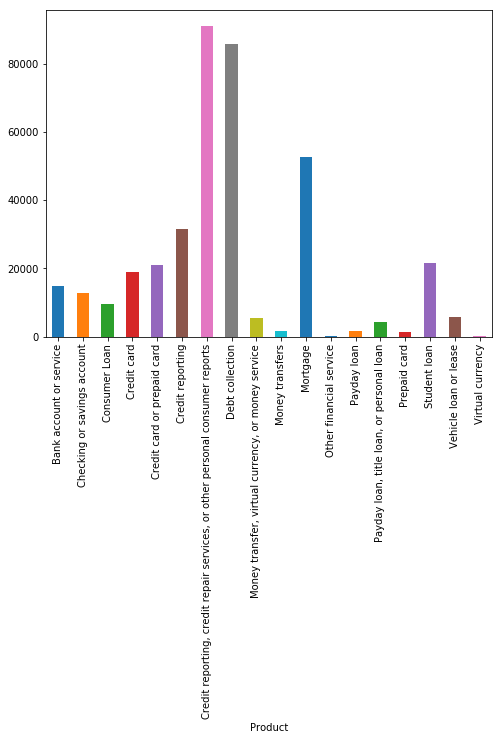

In [30]:
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

# III - Text Representation

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    ### sublinear_df is set to True to use a logarithmic form for frequency
    ### min_df is the minimum numbers of documents a word must be present in to be kept
    ### norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
    ### ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
    ### stop_words is set to “english” to remove all common pronouns (“a”, “the”, …) to reduce the number of noisy features

# Learn vocabulary and idf, return term-document matrix
features = tfidf.fit_transform(df.Consumer_complaint_narrative) 
labels = df.Product_id

In [51]:
features.shape

(379830, 721147)

In [71]:
# Use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products
from sklearn.feature_selection import chi2
N = 2
for Product, Product_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == Product_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. 00 bonus
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle
. car
  . Most correlated bigrams:
. chrysler capital
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. disputed resolve
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. report understanding


# IV - Multi-Class Classifier

C:\Users\yassir.idsougou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yassir.idsougou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


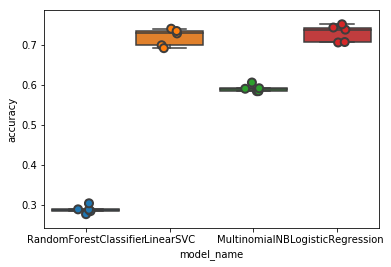

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
        ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [74]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.718861
LogisticRegression        0.729171
MultinomialNB             0.591125
RandomForestClassifier    0.288066
Name: accuracy, dtype: float64

In [76]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, indices_train, indices_test = \
train_test_split(features, labels, df.index, test_size = 0.33, random_state = 0)

# Train the model on training data
model = LinearSVC()
model.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = model.predict(X_test)

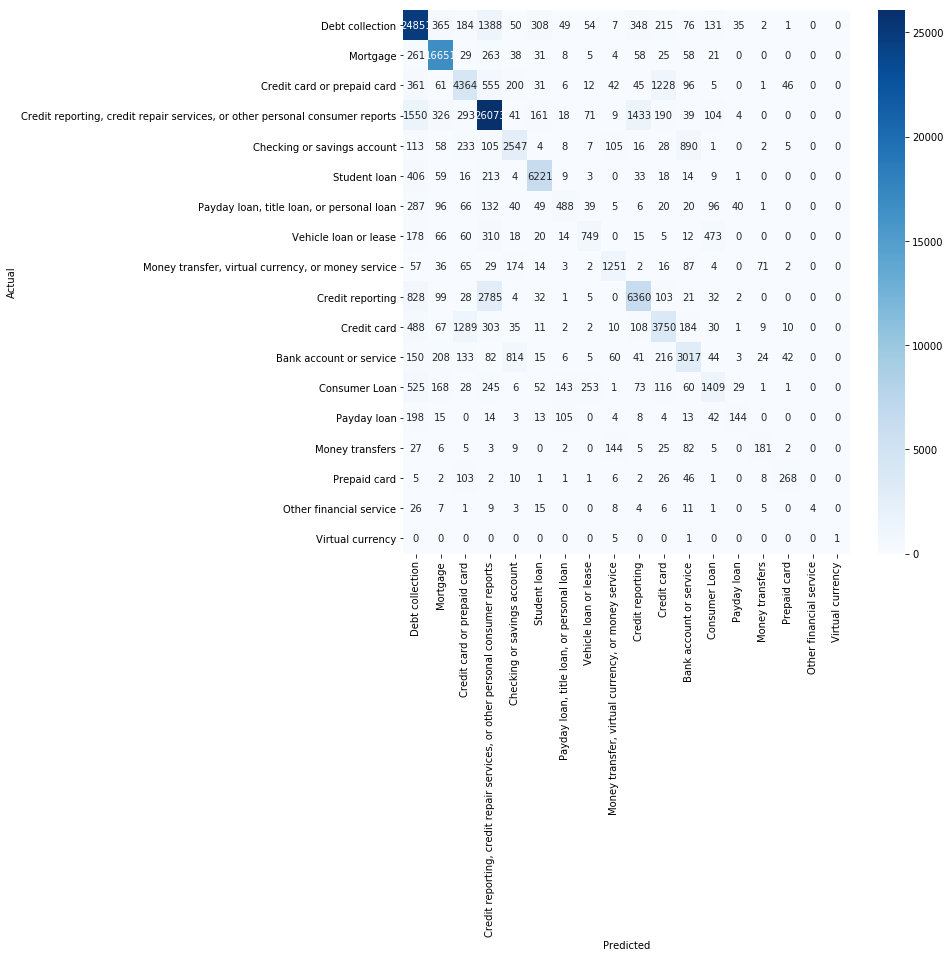

In [83]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, cmap = 'Blues', annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [80]:
from IPython.display import display
for predicted in category_id_df.Product_id:
    for actual in category_id_df.Product_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
                print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                                   id_to_category[predicted], conf_mat[actual, predicted]))
                display(df.loc[indices_test[(y_test == actual) & 
                                          (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
                print('')

'Mortgage' predicted as 'Debt collection' : 261 examples.


,Product,Consumer_complaint_narrative
516126,Mortgage,Loan Servicing company trying to collect disch...
123170,Mortgage,This is my 2nd time coming to CFPB for help. T...
249918,Mortgage,you said that you need moor information on cas...
49530,Mortgage,This is about an issue that I have addressed s...
141311,Mortgage,mortgage loan XXXX receive a call from my old ...
143259,Mortgage,My number is in an auto-dialer for XXXX XXXX X...
385064,Mortgage,"In XXXX of XXXX, I signed a retainer and have ..."
772472,Mortgage,FAIR COLLECTIONS AND OUTSOURSING has placed er...
500221,Mortgage,Wells Fargo Home Mortgage acting as a service ...
375074,Mortgage,"MASSIVE DATA BREECH! NOTED IN XXXX 2016, CALLE..."



'Credit card or prepaid card' predicted as 'Debt collection' : 361 examples.


,Product,Consumer_complaint_narrative
249768,Credit card or prepaid card,I am attaching a description of what happened ...
446888,Credit card or prepaid card,Company calls me at least 6-10 times daily. Tr...
349116,Credit card or prepaid card,The law requires a meeting of the minds or a c...
196197,Credit card or prepaid card,On XX/XX/XXXX I reported and disputed a charge...
142768,Credit card or prepaid card,ON XX/XX/XXXX MY FRIEND AND I CALLED DISCOVER ...
484423,Credit card or prepaid card,TD Credit/ XXXX XXXX cancelled my credit...
276648,Credit card or prepaid card,NOTE : THIS IS NOT A DUPLICATE. IT IS A NEw CO...
395908,Credit card or prepaid card,this complain is for the collection practices ...
158019,Credit card or prepaid card,I have repeatedly provided Discover Card with ...
336029,Credit card or prepaid card,I have previously filed complaint and they did...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 1550 examples.


,Product,Consumer_complaint_narrative
492117,"Credit reporting, credit repair services, or o...",I contacted Trans Union about a collection a...
138852,"Credit reporting, credit repair services, or o...",Please assist with misreporting by Discover Fi...
143414,"Credit reporting, credit repair services, or o...",This is inaccurately reporting on my credit re...
423815,"Credit reporting, credit repair services, or o...",XXXX XXXX is report erroneous things on my cre...
231093,"Credit reporting, credit repair services, or o...",I had consolidated my loans to XXXX. Mid- XX/X...
209455,"Credit reporting, credit repair services, or o...",this was paid off
435091,"Credit reporting, credit repair services, or o...",In response to closed complaint number XXXX - ...
104918,"Credit reporting, credit repair services, or o...",In XX/XX/XXXX I tried to rent a house in XXXX ...
149533,"Credit reporting, credit repair services, or o...",Hello. They are trying to charge me for 2 mont...
387537,"Credit reporting, credit repair services, or o...",Accounts with debt collector that have no rela...



'Checking or savings account' predicted as 'Debt collection' : 113 examples.


,Product,Consumer_complaint_narrative
333663,Checking or savings account,I WAS TOLD THAT BECAUSE I AM A XXXX / XXXX PER...
376473,Checking or savings account,Violation of my individual ( rights ) due proc...
288900,Checking or savings account,I scheduled a payment with my XXXX credit card...
473741,Checking or savings account,I started a gym membership with XXXX XXXX ....
168970,Checking or savings account,They are calling me about XXXX XXXX that was s...
281408,Checking or savings account,We had an over draft of XXXX and received XXXX...
248494,Checking or savings account,A so called magazine debt collector called me ...
107205,Checking or savings account,I have contacted them numerous times. I have e...
90016,Checking or savings account,"On XX/XX/2016, I had a consultation with a XXX..."
440244,Checking or savings account,Opened an account. Deposited a check for {$900...



'Student loan' predicted as 'Debt collection' : 406 examples.


,Product,Consumer_complaint_narrative
857885,Student loan,I have had a few of my student loan collectors...
178925,Student loan,My sister received a call from a company calle...
408333,Student loan,This is not my loan and I did not take this lo...
500069,Student loan,Navient ( formerly XXXX ) has been harassing m...
270959,Student loan,I received a deferment on my student loan two ...
305676,Student loan,i WAS CONTACTED 6 MONTHS AGO BY VAN RU CREDIT ...
162932,Student loan,All these account have been contested and cons...
727066,Student loan,A party calling themselves XXXX contacted a 3r...
686889,Student loan,I told Premier Credit on XXXX/XXXX/16 they cal...
446261,Student loan,I have made several attempts to get resolution...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 287 examples.


,Product,Consumer_complaint_narrative
232946,"Payday loan, title loan, or personal loan",I got behind on the loan and they had me serve...
129767,"Payday loan, title loan, or personal loan",I was given a payday loan for XXXX $ they init...
122829,"Payday loan, title loan, or personal loan","I took out a loan a few years ago, I paid on t..."
350936,"Payday loan, title loan, or personal loan","Today a process server, XXXX XXXX, called my c..."
273109,"Payday loan, title loan, or personal loan","On XX/XX/2018, XXXX XXXX XXXX XXXX XXXX fraudu..."
477007,"Payday loan, title loan, or personal loan",I attempted to make a payment onlver the phone...
222854,"Payday loan, title loan, or personal loan",I am being sued by one main financial for a ti...
34717,"Payday loan, title loan, or personal loan","Back in XX/XX/2018, I went to XXXX XXXX XXXX X..."
349528,"Payday loan, title loan, or personal loan",I contacted the loan places Im on XXXX XXXX th...
120255,"Payday loan, title loan, or personal loan",I am late on making payment but have been in c...



'Vehicle loan or lease' predicted as 'Debt collection' : 178 examples.


,Product,Consumer_complaint_narrative
167842,Vehicle loan or lease,LETTER TO COLLECTION COMPANY DESCRIBING SITUAT...
462619,Vehicle loan or lease,They financial company keep harassment me. The...
290075,Vehicle loan or lease,In 2012 Hurricane Sandy had totaled my truck. ...
222015,Vehicle loan or lease,I have an auto loan with AFS Acceptance and I ...
434398,Vehicle loan or lease,Purchased a car from carmart and would not fix...
474450,Vehicle loan or lease,"XX/XX/XXXX , day before my XXXX birthday ..."
202493,Vehicle loan or lease,After having to leave the state of Colorado du...
387409,Vehicle loan or lease,I have a car loan with XXXX XXXX XXXX. Admitte...
351662,Vehicle loan or lease,XX/XX/XXXX I put in a application to refinance...
375381,Vehicle loan or lease,XXXX XXXX ( # XXXX ) had my lease. Problem hap...



'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 57 examples.


,Product,Consumer_complaint_narrative
282874,"Money transfer, virtual currency, or money ser...","n XXXX of 2017, My internet friend named XXXX ..."
200377,"Money transfer, virtual currency, or money ser...",Some thieves stole the identity of a friend to...
457157,"Money transfer, virtual currency, or money ser...",My account is negative because of an XXXX and ...
333165,"Money transfer, virtual currency, or money ser...","Account Details Last Reported XXXX XXXX, XXXX ..."
384522,"Money transfer, virtual currency, or money ser...","To The CFPB, Paypal illegally took back and pl..."
161759,"Money transfer, virtual currency, or money ser...",My daughter called me to inform me that we rec...
49501,"Money transfer, virtual currency, or money ser...",seems XXXX XXXX XXXX HIRED A LAWYER TO COLLECT...
310357,"Money transfer, virtual currency, or money ser...",I sold some of my annuity to a company called ...
287690,"Money transfer, virtual currency, or money ser...","Monies were transferred twice, to a bank in XX..."
283764,"Money transfer, virtual currency, or money ser...",I received notice that there was a {$700.00} u...



'Credit reporting' predicted as 'Debt collection' : 828 examples.


,Product,Consumer_complaint_narrative
593429,Credit reporting,There is a medical collection debt on my credi...
810051,Credit reporting,There is an account for XXXX DVD that has been...
747452,Credit reporting,The company originally had my account listed r...
512554,Credit reporting,My lease with The XXXX apartments was terminat...
770098,Credit reporting,I am listed as having an outstanding debt on a...
814672,Credit reporting,I believe this account to belong to my father ...
783882,Credit reporting,i paid off the for XXXX XXXX and they need to ...
550760,Credit reporting,The Creditor is reporting past the terms allow...
586281,Credit reporting,I was in a car accident XX/XX/2012. I was with...
706402,Credit reporting,"XXXX XXXX has reported me as charged-off, even..."



'Credit card' predicted as 'Debt collection' : 488 examples.


,Product,Consumer_complaint_narrative
702246,Credit card,Requested a validation of all account level in...
877710,Credit card,"I did not know the category to select, but thi..."
878302,Credit card,I have big problem with Chase credit card.I we...
690445,Credit card,"The company, Kohl 's Dept Store NY is contacti..."
588551,Credit card,I purchased XXXX dog beds from XXXX. They both...
612775,Credit card,"In a letter dated XXXX XXXX, 2016 attached in ..."
701270,Credit card,American Express sent me a copy of another per...
870090,Credit card,The credit card had additional cost for insura...
869003,Credit card,I received a debt collector letter states I ow...
690345,Credit card,A credit card I had with XXXX was sold to anot...



'Bank account or service' predicted as 'Debt collection' : 150 examples.


,Product,Consumer_complaint_narrative
646050,Bank account or service,In the last few days ( XX/XX/XXXX through XX/X...
582201,Bank account or service,This is about the Flexible Spending Account ca...
528490,Bank account or service,"XX/XX/2017 CFPB : JPMChase contractor "" XXXX '..."
629721,Bank account or service,I have been contacted by several companies reg...
593458,Bank account or service,Harassment phone calls from Capital one Bank o...
761420,Bank account or service,For many months now I have received automated ...
678934,Bank account or service,We scheduled a time to open an IRA account for...
659262,Bank account or service,SYNCB/LOWE 'S DC ACCOUNT NUMBERs : XXXX XX/XX/...
576946,Bank account or service,looking online XX/XX/2016 at the bank 's state...
722753,Bank account or service,i tried to apply for a loan and was told i had...



'Consumer Loan' predicted as 'Debt collection' : 525 examples.


,Product,Consumer_complaint_narrative
890679,Consumer Loan,I am getting daily phone calls from Hyundia cr...
883905,Consumer Loan,XXXX has listed on my credit report a debt tha...
790203,Consumer Loan,"Approximately XX/XX/XXXX, I returned a vehicle..."
525859,Consumer Loan,After numerous reports to the CFPB that I have...
557060,Consumer Loan,The branch office filing lawsuits in magistrat...
851827,Consumer Loan,a debt collector from consumer portfolio ( cps...
715178,Consumer Loan,"they are calling my family members, my job my ..."
621201,Consumer Loan,"Hi I received a call from "" Law office of Scot..."
544126,Consumer Loan,"Good evening team, I 'm filing a complaint on ..."
845625,Consumer Loan,I purchased furniture from XXXX in the summer ...



'Payday loan' predicted as 'Debt collection' : 198 examples.


,Product,Consumer_complaint_narrative
660939,Payday loan,harassment calls at place of employment. Colle...
736495,Payday loan,"Just got another call from a "" XXXX XXXX '' fr..."
500039,Payday loan,Getting multiple calls a day from a company wh...
668342,Payday loan,I received a pay day loan in XX/XX/XXXX. Due t...
729540,Payday loan,Leader Cashnetusa will not stop contacting my ...
856151,Payday loan,Concord resolution has been harassing my phone...
592611,Payday loan,I am not XXXX sure of entire issue because com...
747437,Payday loan,I received a call from Dollar Loan Center abou...
572488,Payday loan,"According to XXXX Management, I am in a collec..."
809432,Payday loan,Lender called my mother stated that if I did n...



'Money transfers' predicted as 'Debt collection' : 27 examples.


,Product,Consumer_complaint_narrative
699337,Money transfers,I was tricked into being hired by this work fr...
679506,Money transfers,i got a call from a random number talking abou...
850474,Money transfers,PayPal XXXX trying to collect a debt of {$210....
663505,Money transfers,"On XXXX XXXX, XXXX I received a call form a la..."
844581,Money transfers,I SENT MONEY TO XXXX SUCCESSFULLY FOR THE PAST...
875145,Money transfers,"On XXXX XXXX, 2015, I, an XXXX year old reside..."
545455,Money transfers,WESTERNUNION ALLOWED THEM TO COMMIT FRAUD AGAI...
673961,Money transfers,Today I received an email from Western Union. ...
831662,Money transfers,Someone impersonating our grandson called us o...
798466,Money transfers,supossedly I was sent a text message from an a...



'Other financial service' predicted as 'Debt collection' : 26 examples.


,Product,Consumer_complaint_narrative
793386,Other financial service,Nicholes Financial Inc is reporting a Charged ...
556122,Other financial service,we signed up with Global Client Solutions to c...
866883,Other financial service,I entered into a contract with Trinity Credit ...
704351,Other financial service,I attempted to exchange euros to dollars at th...
787767,Other financial service,"I order an item on XXXX, attempted to pay it w..."
759840,Other financial service,I was enrolled in a program XXXX XXXX XXXX thr...
502360,Other financial service,"I find that this company, Riverwalk Debt Solut..."
568068,Other financial service,"In an attempt to pay down my student loans, th..."
792957,Other financial service,Reference Case # XXXX The XXXX money orders th...
747418,Other financial service,I sign on with ClearOne Advantage debt settlem...



'Debt collection' predicted as 'Mortgage' : 365 examples.


,Product,Consumer_complaint_narrative
344951,Debt collection,Ditech Financial LLC first appeared on my cred...
394919,Debt collection,Bank of America 's Collections Unit sent a NOT...
163054,Debt collection,This is an ongoing dispute with a Mortgage Ser...
204208,Debt collection,Complaint : SPS 's failure to specifically and...
547653,Debt collection,Bayview Loan Servicing and their attorneys at ...
455014,Debt collection,I had a HELOC with Specialized Loan Servicing ...
187430,Debt collection,Hope that you can help. \n\nI am a XXXX with 3...
461374,Debt collection,X/XX/17 The Honorable Consumer Financial Prote...
820334,Debt collection,"This is new information, and a new complaint, ..."
133106,Debt collection,"Based on my discovery, XXXX XXXX, XXXX has acc..."



'Credit card or prepaid card' predicted as 'Mortgage' : 61 examples.


,Product,Consumer_complaint_narrative
46446,Credit card or prepaid card,I sold my gift cards to XXXX who has left it ...
168746,Credit card or prepaid card,I opened an account with wells fargo to buy fu...
144145,Credit card or prepaid card,I have unsubscribed from all marketing and com...
319672,Credit card or prepaid card,"Beginning in XXXX of XXXX, I separated from my..."
143812,Credit card or prepaid card,Bank of America does not reduce the balance ow...
492759,Credit card or prepaid card,The late payments reported by Key Bank to the...
355754,Credit card or prepaid card,I have n't received a response to emails to co...
161813,Credit card or prepaid card,XXXX - CFPB allows the Safe Harbor act to be v...
238257,Credit card or prepaid card,I have always had problems with this bank. But...
185208,Credit card or prepaid card,"This is a follow-up to CFPB case number XXXX, ..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 326 examples.


,Product,Consumer_complaint_narrative
42584,"Credit reporting, credit repair services, or o...",I submitted a loan modification last XX/XX/201...
76422,"Credit reporting, credit repair services, or o...",On XX/XX/2016 I opened an account with Wells F...
310895,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, VA XX..."
444509,"Credit reporting, credit repair services, or o...",I default on a second mortgage with XXXX XXXX ...
482344,"Credit reporting, credit repair services, or o...",Mortgage was transferred to another bank and i...
384976,"Credit reporting, credit repair services, or o...","I, XXXX XXXX tried to have a credit item remov..."
425010,"Credit reporting, credit repair services, or o...",I have filed several complaints already regard...
357497,"Credit reporting, credit repair services, or o...",I 'm currently in the XXXX XXXX and during the...
347739,"Credit reporting, credit repair services, or o...",Our mortgage loan was flagged as a bankruptcy ...
78282,"Credit reporting, credit repair services, or o...",My wife and I contracted with XXXX XXXX XXXX t...



'Checking or savings account' predicted as 'Mortgage' : 58 examples.


,Product,Consumer_complaint_narrative
378184,Checking or savings account,PNC bank is holding my client 's {$5000.00} in...
236880,Checking or savings account,Submitted complaint XXXX. Company responded wi...
155789,Checking or savings account,I originated a home mortgage loan with XXXX XX...
476491,Checking or savings account,"XXXX XXXX, 2017 opened checking acct by deposi..."
168884,Checking or savings account,I am yet again filing a complaint against Well...
422879,Checking or savings account,Please refer to my earlier complaint : XXXX on...
219636,Checking or savings account,Hello : I am a US Bank customer and use online...
447518,Checking or savings account,"I hereby ACCEPT the Oath of all Agencies, prin..."
302084,Checking or savings account,On XX/XX/ I made an online Bill pay through my...
351730,Checking or savings account,I had a checking account with Citizen 's accou...



'Student loan' predicted as 'Mortgage' : 59 examples.


,Product,Consumer_complaint_narrative
107157,Student loan,"I have had several issues with Wells Fargo, li..."
862196,Student loan,My wife holds a conditional XXXX. She applied ...
251487,Student loan,I am re sending the letter dated on XX/XX/XXXX...
502617,Student loan,I received 2 emails saying I had not made a pa...
496302,Student loan,I am attempting to refinance my home and the m...
191877,Student loan,XXXX XXXX XXXX Complaint # XXXX Response Date ...
519297,Student loan,After making a sizable payment ( {$12000.00}. ...
341757,Student loan,I am writing in hopes this does not happen to ...
409798,Student loan,Forgery of XXXX certificates of my XXXX childr...
496744,Student loan,"I paid my loan, but the lender has n't acknowl..."



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 96 examples.


,Product,Consumer_complaint_narrative
242134,"Payday loan, title loan, or personal loan",I took out a loan with Wells Fargo Auto the lo...
385250,"Payday loan, title loan, or personal loan",I started this loan with Cashnet USA this in 2...
484516,"Payday loan, title loan, or personal loan",Found a private loan company on the internet i...
380536,"Payday loan, title loan, or personal loan",They lied about speaking with me and put lies ...
408530,"Payday loan, title loan, or personal loan","On XXXX XXXX, 2017, I applied for a personal l..."
463035,"Payday loan, title loan, or personal loan",I have a home equity line of credit at Bank of...
350832,"Payday loan, title loan, or personal loan",***I do not have an attorney ( counsel ) yet a...
359659,"Payday loan, title loan, or personal loan",on XXXX XXXX I purchase a XXXX XXXX from XXXX ...
157634,"Payday loan, title loan, or personal loan",On the XXXX of XXXX I was approved for a loan ...
438427,"Payday loan, title loan, or personal loan",I was using XXXX XXXX to attain a loan. XXXX X...



'Vehicle loan or lease' predicted as 'Mortgage' : 66 examples.


,Product,Consumer_complaint_narrative
279192,Vehicle loan or lease,Since the beginning of the loan we have paid a...
136127,Vehicle loan or lease,beginning on XX/XX/XXXX I sigmed 3 documents w...
282350,Vehicle loan or lease,It is not the denial that is the issue. i was ...
120216,Vehicle loan or lease,Lender : American Honda Financial Compliant : ...
44731,Vehicle loan or lease,I have made payments that are not applied to m...
284243,Vehicle loan or lease,On XX/XX/XXXX I had made an ACH Payment throug...
384782,Vehicle loan or lease,I obtained a loan from Wells Fargo Financial v...
267877,Vehicle loan or lease,"My loan is with XXXX XXXX, XXXX XXXX XXXX. Ple..."
392601,Vehicle loan or lease,In XX/XX/XXXX I bought a new XXXX XXXX for XX...
343463,Vehicle loan or lease,If you make payments online the website consta...



'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 36 examples.


,Product,Consumer_complaint_narrative
427253,"Money transfer, virtual currency, or money ser...","This is an amendment to Complaint ID XXXX , s..."
365631,"Money transfer, virtual currency, or money ser...",I have a brokerage account with XXXX XXXX. The...
171709,"Money transfer, virtual currency, or money ser...",I incurred a property insurance loss at my hom...
275725,"Money transfer, virtual currency, or money ser...",This complaint is a follow up to complaint num...
73065,"Money transfer, virtual currency, or money ser...",In XXXX I received a check for a settlement wi...
177932,"Money transfer, virtual currency, or money ser...",Family suffered complete loss of home. Insuran...
413148,"Money transfer, virtual currency, or money ser...",On XXXX15 during the blizzard in Massachusetts...
435997,"Money transfer, virtual currency, or money ser...",The year XXXX I met with several brokers and b...
366352,"Money transfer, virtual currency, or money ser...",Took a long time to get my money
259396,"Money transfer, virtual currency, or money ser...",Ditech home loans was my mortgage company. My ...



'Credit reporting' predicted as 'Mortgage' : 99 examples.


,Product,Consumer_complaint_narrative
736809,Credit reporting,TransUnion uses antiquated web programming tha...
570786,Credit reporting,My mortgage was sold in a refinance deal in XX...
600118,Credit reporting,"I went for a mortgage, and found out that ever..."
860304,Credit reporting,I have an account with TransUnion that allows ...
655114,Credit reporting,I am victim of mail and identity theft. Case h...
862400,Credit reporting,XXXX fraudulently reported a foreclosure for a...
513386,Credit reporting,original case # XXXX was resolved except for t...
884928,Credit reporting,I had XXXX rental properties trying to save th...
736613,Credit reporting,Banks tell me I have home morgages open when I...
821841,Credit reporting,I am filing with XXXX XXXX XXXX at the same ti...



'Credit card' predicted as 'Mortgage' : 67 examples.


,Product,Consumer_complaint_narrative
787087,Credit card,I am a XXXX single male whose primary income s...
502791,Credit card,This is an update to my complaint against Stat...
764254,Credit card,My payments going towards 0 % first and paymen...
818029,Credit card,Bank of America charged fees for a payment tha...
567518,Credit card,"Closed on a mortgage with Chase XXXX XXXX, XXX..."
874377,Credit card,I accidently sent a {$1000.00}. payment to Cha...
736873,Credit card,the credit card issuer navy federal fabricated...
557805,Credit card,My payment was sent on XX/XX/2016 the payment ...
589763,Credit card,I sent a payoff for this card in the mail in a...
861584,Credit card,I 'm a long time highly qualified Wellsfargo c...



'Bank account or service' predicted as 'Mortgage' : 208 examples.


,Product,Consumer_complaint_narrative
763871,Bank account or service,My husband and I paid off our personal line of...
613519,Bank account or service,Wells Fargo working with an insurance firm in ...
874990,Bank account or service,My accounts were closed and {$260000.00} was t...
656200,Bank account or service,Last correspondence from Chase dated XXXX XXXX...
848069,Bank account or service,I went into XXXX on the Internet on XX/XX/XXXX...
701049,Bank account or service,I have asked Shellpoint to forward my Mortgage...
593885,Bank account or service,I received a call today from Central Mortgage ...
802330,Bank account or service,"Good morning, In 2006, I applied for a 30yr fi..."
558356,Bank account or service,I 'm certain that Nationstar figured out my ac...
705467,Bank account or service,I own half the house. My father is getting XXX...



'Consumer Loan' predicted as 'Mortgage' : 168 examples.


,Product,Consumer_complaint_narrative
746276,Consumer Loan,I had a credit loan through Wells Fargo Dealer...
796473,Consumer Loan,I have had loans threw State Farm Bank. I rece...
782062,Consumer Loan,XXXX XXXX XXXX taken in XXXX was added to pare...
547491,Consumer Loan,"XXXX Hello, I am writing to complain about PNC..."
699536,Consumer Loan,I recently applied on-line with SpringLeaf Fin...
731809,Consumer Loan,I have been trying to get a name off a title a...
834758,Consumer Loan,First I need you to be aware that I have a XXX...
568856,Consumer Loan,Ditech will not provide original documents or ...
808774,Consumer Loan,"I recently received a "" Certificate of Savings..."
722539,Consumer Loan,XX/XX/2016 I was researching for a good option...



'Payday loan' predicted as 'Mortgage' : 15 examples.


,Product,Consumer_complaint_narrative
700922,Payday loan,I 've been getting letters from loan places. I...
568525,Payday loan,Lender WLCC XXXX/DBA Arrowhead Advance is char...
586128,Payday loan,Credit Shop said my interest rate was 32.25 %....
607805,Payday loan,My bank is XXXX in Illnois. I notified Essenti...
836826,Payday loan,I applied for a loan with company and was appr...
791869,Payday loan,"Almost 18 months ago, my loan was purchased by..."
696980,Payday loan,lender was ordered to forgive debt - I was not...
610677,Payday loan,The company 's website does not give a clear c...
887561,Payday loan,I apply for a Loan with no interest for XXXX m...
745606,Payday loan,In XXXX my husband got a probate cash advance ...



'Debt collection' predicted as 'Credit card or prepaid card' : 184 examples.


,Product,Consumer_complaint_narrative
808812,Debt collection,Bank of America is reporting an original charg...
191399,Debt collection,bank of America XX/XX/17 account opened in my ...
369129,Debt collection,"XXXX XXXX, XXXX. XXXX XXXX ( Research Remediat..."
472469,Debt collection,I set up a payment plan with the company ; 4 p...
385056,Debt collection,My wife and I both had XXXX accounts with XXXX...
455202,Debt collection,Hi I 'm XXXX XXXX. This was back a couple mont...
164425,Debt collection,This account should be deleted. Company never ...
385870,Debt collection,On XXXX/XXXX/XXXX I ordered it and made a tran...
320915,Debt collection,I signed up for XXXX XXXX XXXX card and I alwa...
415201,Debt collection,I went to a dentist and was offered the Care C...



'Mortgage' predicted as 'Credit card or prepaid card' : 29 examples.


,Product,Consumer_complaint_narrative
718134,Mortgage,Reference your complaint number XXXX. In regua...
144528,Mortgage,I called BOA on XX/XX/2018 and wanted to make ...
185200,Mortgage,I have an equity line with PNC Bank. I have no...
173743,Mortgage,We were charged twice for the month of XX/XX/X...
352308,Mortgage,Despite applying overpayments to my principal ...
836962,Mortgage,I applied for a XXXX mortgage with BMO Harris ...
46929,Mortgage,"on XX/XX/2019, between XXXX and XXXX XXXX., US..."
201202,Mortgage,I have a loan with THE MONEY SOURCE. I have al...
54897,Mortgage,XX/XX/XXXX funds withdrawn from my checking ac...
808058,Mortgage,Denied credit for exercising my rights under t...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 293 examples.


,Product,Consumer_complaint_narrative
269653,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX a fraudulent application for cre...
249584,"Credit reporting, credit repair services, or o...",I opened an account with XXXX XXXX XXXX in XXX...
127926,"Credit reporting, credit repair services, or o...","Good morning, My name is XXXX XXXX I financed ..."
300405,"Credit reporting, credit repair services, or o...",Hi my name is XXXX XXXX and I am writing becau...
489219,"Credit reporting, credit repair services, or o...",I reluctantly opened a Kohs charge card with...
221815,"Credit reporting, credit repair services, or o...",Hello I am writing this regarding an old case ...
42571,"Credit reporting, credit repair services, or o...",the credit card limit was {$500.00} they told ...
395977,"Credit reporting, credit repair services, or o...","XX/XX/2017, total amount : {$200.00}. I booked..."
230759,"Credit reporting, credit repair services, or o...",I recently received a report on the disturbing...
324800,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I called Capital One conce..."



'Checking or savings account' predicted as 'Credit card or prepaid card' : 233 examples.


,Product,Consumer_complaint_narrative
98988,Checking or savings account,On XX/XX/2018 my wife and I checked into an XX...
230550,Checking or savings account,I am making a complaint against XXXX XXXX XXXX...
198236,Checking or savings account,"To Whom it May Concern, Im trying to report my..."
274655,Checking or savings account,Hello- My checking account ending ending in XX...
101940,Checking or savings account,I closed the account and recently found out th...
302288,Checking or savings account,We applied for re-entry permit to XXXX and pai...
59272,Checking or savings account,"When I opened the checking account, it came wi..."
213221,Checking or savings account,I disputed a transaction for {$76.00} with my ...
257477,Checking or savings account,on XX/XX/XXXX i processed a payment thru my Bi...
250382,Checking or savings account,XXXX opened an account in my name that I didn'...



'Student loan' predicted as 'Credit card or prepaid card' : 16 examples.


,Product,Consumer_complaint_narrative
195743,Student loan,I have a loan with XXXX. I have always made my...
284686,Student loan,I was shocked when reviewing my credit report ...
555330,Student loan,It will show up on my account that no payment ...
146399,Student loan,I went to make a payment online on XX/XX/2018 ...
334406,Student loan,I received the attached email message this eve...
151183,Student loan,I enrolled in a rate reduction plan in which m...
470450,Student loan,I am a US citizen but no longer live in the U...
364907,Student loan,"My lender, Discover, issues an email message t..."
185116,Student loan,Navient received two payments from my bank one...
77988,Student loan,I have a loan with CAPITAL ONE. I have always ...



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 66 examples.


,Product,Consumer_complaint_narrative
303194,"Payday loan, title loan, or personal loan","To whom it May Concern On XX/XX/XXXX, I receiv..."
145507,"Payday loan, title loan, or personal loan","In XX/XX/XXXX, I opened a line of credit as a ..."
160837,"Payday loan, title loan, or personal loan","Good Afternoon, I am hoping you can help me wi..."
294954,"Payday loan, title loan, or personal loan",I received preapproval offers in the mail from...
266768,"Payday loan, title loan, or personal loan",in the mail i received checks for a loan to ju...
90371,"Payday loan, title loan, or personal loan","Several months ago, I filed 2-3 complaints aga..."
257834,"Payday loan, title loan, or personal loan",I discovered late night on XX/XX/XXXX the foll...
367592,"Payday loan, title loan, or personal loan","XX/XX/XXXX, I received a Mail Correspondence t..."
258761,"Payday loan, title loan, or personal loan",While I am not currently experience personal i...
349331,"Payday loan, title loan, or personal loan",I 've been struggling financially due to healt...



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 60 examples.


,Product,Consumer_complaint_narrative
80365,Vehicle loan or lease,I was shocked when reviewing my credit report ...
71021,Vehicle loan or lease,"When I first purchased the vehicle, I was told..."
330677,Vehicle loan or lease,A payment for XXXX that the Westlake Financial...
61585,Vehicle loan or lease,I have a loan with CONNS. I have always made m...
76602,Vehicle loan or lease,On XX/XX/18 I purchased a car from XXXX XXXX d...
111450,Vehicle loan or lease,I have a auto loan with bbva compass. I have m...
200461,Vehicle loan or lease,XXXX XXXX XXXX ATTN : XXXX XXXX XXXX XXXX XXXX...
276742,Vehicle loan or lease,I made my lease payment at the end of XX/XX/XX...
366543,Vehicle loan or lease,"The basis for my dispute is "" Capital One Auto..."
482715,Vehicle loan or lease,I was shocked when I reviewed my credit report...



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 65 examples.


,Product,Consumer_complaint_narrative
463266,"Money transfer, virtual currency, or money ser...","My Check was declined by XXXX XXXX in XXXX, Oh..."
191970,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, I tried to pay an account via o..."
114404,"Money transfer, virtual currency, or money ser...",XX/XX/18. I bank with American Express I have ...
288016,"Money transfer, virtual currency, or money ser...",There were three unauthorized transactions fro...
81310,"Money transfer, virtual currency, or money ser...",Hello I am a customer with U.S Bank almost one...
312478,"Money transfer, virtual currency, or money ser...",Unable to log in as 2FA code was lost. Filed i...
358402,"Money transfer, virtual currency, or money ser...",My XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXX...
100095,"Money transfer, virtual currency, or money ser...","I have a business account with XXXX XXXX, on T..."
270918,"Money transfer, virtual currency, or money ser...",Card was previously added to the XXXX payments...
435093,"Money transfer, virtual currency, or money ser...",I have been in contact with this company since...



'Credit reporting' predicted as 'Credit card or prepaid card' : 28 examples.


,Product,Consumer_complaint_narrative
535332,Credit reporting,I recently learned from a collection agency ( ...
568597,Credit reporting,The credit reporting agencies improperly enter...
551141,Credit reporting,I have paid this account by phone for XXXX yea...
612081,Credit reporting,I have spoken to and reviewed my credit report...
760951,Credit reporting,"In XXXX, I had XXXX payments returned from XXX..."
532278,Credit reporting,"Hello, I have had this Nordstrom credit card f..."
845139,Credit reporting,On XX/XX/XXXX I wrote a response to a letter f...
797344,Credit reporting,MY WELLS FARGO CREDIT CARD LIMIT IS INCORRECTL...
532301,Credit reporting,My credit card co. enrolled me with out my kno...
536828,Credit reporting,My XXXX XXXX Credit card was stolen. I contact...



'Credit card' predicted as 'Credit card or prepaid card' : 1289 examples.


,Product,Consumer_complaint_narrative
523593,Credit card,A credit card was mailed to an address in XXXX...
590474,Credit card,I was overcharged for a rental and I never swi...
880640,Credit card,The conversation I had with the American Expre...
631364,Credit card,I received a Double Cash card from Citi in ear...
564228,Credit card,"Dear Sir/Madam, I am writing to complain about..."
832278,Credit card,Hi I have a homedepot credit card ( citi bank ...
578760,Credit card,Walmart offered 15 % discount on todays ' purc...
630717,Credit card,I received suspicious mail after Capital One p...
558414,Credit card,I have had the SallieMae credit card for one y...
856033,Credit card,I have a card with Chase for many years and I ...



'Bank account or service' predicted as 'Credit card or prepaid card' : 133 examples.


,Product,Consumer_complaint_narrative
512493,Bank account or service,Our car was stolen with my wallet in it. It ha...
626500,Bank account or service,I opened XXXX with American Express Serve card...
530667,Bank account or service,I believe that I was charged or enrolled in Wa...
876663,Bank account or service,Activated citibank Debit Visa card on XX/XX/XX...
541151,Bank account or service,XX/XX/XXXX - I performed a cash load of {$2500...
675755,Bank account or service,I submitted an application to deposit {$4000.0...
568952,Bank account or service,I am a long standing Wells Fargo banking custo...
891345,Bank account or service,An merchant account was created in my business...
560855,Bank account or service,To whom it may concern ; I am writing in regar...
661884,Bank account or service,"I 've been with NetSpend, a XXXX entity since ..."



'Consumer Loan' predicted as 'Credit card or prepaid card' : 28 examples.


,Product,Consumer_complaint_narrative
511827,Consumer Loan,Conns continually sends me notices stating tha...
792189,Consumer Loan,"No credit line increase allowed, Synchrony Ban..."
701033,Consumer Loan,There seems to be an extraordinarily confusing...
673545,Consumer Loan,"Since receiving the loan, Duvera Financial has..."
719856,Consumer Loan,The week of XX/XX/XXXX I purchased a TV from X...
787003,Consumer Loan,Sears XXXX XXXX XXXX XXXX keeps advertising Ap...
700407,Consumer Loan,"Hi On XXXX, XXXX I purchased Furntiure from XX..."
644704,Consumer Loan,I have attempted to dispute a transaction beca...
675182,Consumer Loan,Charging late fees with no reason : Payments m...
802672,Consumer Loan,Making payments on time to Well Fargo. XXXX co...



'Prepaid card' predicted as 'Credit card or prepaid card' : 103 examples.


,Product,Consumer_complaint_narrative
584155,Prepaid card,I used my American Express card the number is ...
834900,Prepaid card,On Several times I contact American Express an...
715828,Prepaid card,On XXXX XXXX XXXX my income tax was deposited ...
648434,Prepaid card,I purchase a prepaid XXXX at XXXX and the rece...
774987,Prepaid card,I used myXXXX Gift card at a gas station to ge...
527747,Prepaid card,I purchased an American Express Secure Pay Gif...
780128,Prepaid card,I begin receiving text messages on XXXX/XXXX/1...
800361,Prepaid card,I received XXXX ( XXXX ) USBank Cash+ Bonus Re...
496682,Prepaid card,"Dear Sir, I purchased several XXXX giftcards..."
604061,Prepaid card,Front of sheet accompanying prepaid card indic...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1388 examples.


,Product,Consumer_complaint_narrative
88497,Debt collection,"XX/XX/XXXX, {$220.00} tried calling the origin..."
179935,Debt collection,I have completed three written requests for le...
890359,Debt collection,I applied for a payday loan to help my XXXX so...
805872,Debt collection,I do not know who opened the account and didnt...
263624,Debt collection,I am a XXXX XXXX with a child. I was forced to...
411139,Debt collection,On or about XXXX XXXX I received notification ...
488324,Debt collection,I have no recollection of any business transac...
420354,Debt collection,XXXX XXXX XXXX. Is continuing to report. Debt ...
476677,Debt collection,I just want them to investigate XXXX complaint...
751806,Debt collection,This company is reporting false information to...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 263 examples.


,Product,Consumer_complaint_narrative
498040,Mortgage,Caliber Home Loans is not reporting accurate i...
248118,Mortgage,"To whom it may concern, I live in XXXX Florid..."
594537,Mortgage,US Bank has not released the lien and sent pro...
641858,Mortgage,Almost a week ago I started shopping for house...
366353,Mortgage,I Applied for a VA mortgage through XXXX Mortg...
155000,Mortgage,This complaint is regarding XXXX XXXX XXXX XXX...
69476,Mortgage,I made two payments that were never credited t...
715432,Mortgage,We make our payments on the 1st of every month...
626578,Mortgage,Ocwen continues to report XXXX different mortg...
287328,Mortgage,"On XX/XX/XXXX, I engaged XXXX to dispute on my..."



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 555 examples.


,Product,Consumer_complaint_narrative
315823,Credit card or prepaid card,I have a business Chase account that was opene...
56688,Credit card or prepaid card,"XXXX XXXX XXXX, XX/XX/2018, XXXX card account..."
143558,Credit card or prepaid card,I have a late reporting on my account SYNCB/XX...
328508,Credit card or prepaid card,i XX/XX/XXXX5 26 accounts open through fraud. ...
150113,Credit card or prepaid card,"My wife and I went to purchase furniture, when..."
100100,Credit card or prepaid card,Chase Bank has requested my credit report with...
161577,Credit card or prepaid card,An hard inquiry was found on my credit report ...
205712,Credit card or prepaid card,I received an Exclusive Pre- Qualified credit ...
72385,Credit card or prepaid card,Capital One reported to the credit bureaus tha...
294662,Credit card or prepaid card,"XX/XX/XXXX XXXX {$1500.00} ), XX/XX/XXXX ( {$1..."



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 105 examples.


,Product,Consumer_complaint_narrative
430459,Checking or savings account,Bank of America reported some overdraft accoun...
330327,Checking or savings account,Bank Of America is reporting to XXXX XXXX that...
461206,Checking or savings account,"On XXXX XXXX , 2017 , EXPERIAN ( XXXX ..."
209886,Checking or savings account,Capital One is blocking my reports and informa...
453640,Checking or savings account,Bank of America has blocked all my access to b...
40737,Checking or savings account,It was a XXXX XXXX XXXX on XXXX and XXXX who i...
74125,Checking or savings account,"XX/XX/2018,, And Cotinuting Problems, If Wells..."
202980,Checking or savings account,I'm trying to sign up with XXXX XXXX ( XXXX XX...
330091,Checking or savings account,I am a victim of identity theft. Regions has r...
114313,Checking or savings account,{$15.00} Date XX/XX/2018 XXXX XXXX transaction...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 213 examples.


,Product,Consumer_complaint_narrative
557713,Student loan,I took out a student loan through Great Lakes ...
46132,Student loan,I am writing to express my dissatisfaction wit...
242067,Student loan,"XXXX XXXX, XXXX, and XXXX do not provide adequ..."
290367,Student loan,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX X...
435857,Student loan,I have tried to resolve a credit dispute with ...
467828,Student loan,I have disputed this matter countless times to...
615880,Student loan,There 's numerous inquiries on my credit repor...
542179,Student loan,Never was completely sure of amount to pay
408337,Student loan,There are several discrepancies that are showi...
578466,Student loan,"For the second consecutive month, Sallie Mae h..."



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 132 examples.


,Product,Consumer_complaint_narrative
371803,"Payday loan, title loan, or personal loan",I financed XXXX XXXX XXXX XXXX with XXXX XXXX ...
126407,"Payday loan, title loan, or personal loan",Was offered a new loan when I went in to make ...
301149,"Payday loan, title loan, or personal loan",Acct is past statue of limitations - debt was ...
366049,"Payday loan, title loan, or personal loan","Dear Sir or Madam, I am contacting you to info..."
428615,"Payday loan, title loan, or personal loan",My husband and I open a personal loan through ...
212459,"Payday loan, title loan, or personal loan",I had an account with this company last year t...
301798,"Payday loan, title loan, or personal loan",Representative of company came to my elderly m...
327285,"Payday loan, title loan, or personal loan",To Whom It May Concern : Hello my name is XXXX...
116353,"Payday loan, title loan, or personal loan",This account was charged off as a negative ite...
105516,"Payday loan, title loan, or personal loan",In XXXX I when shopping for a Home Equity Line...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 310 examples.


,Product,Consumer_complaint_narrative
183625,Vehicle loan or lease,My auto loan was sold to Santander in the amou...
193430,Vehicle loan or lease,"As of XX/XX/XXXX, my car loan with XXXX XXXX X..."
245261,Vehicle loan or lease,I'm writing about my account with XXXX XXXX XX...
128195,Vehicle loan or lease,Fraudulent Loan. Consumer signed a Negotiable ...
199539,Vehicle loan or lease,XXXX the HDFS manger called the XXXX police on...
63666,Vehicle loan or lease,I was traveling to my home country and set up ...
444543,Vehicle loan or lease,The vehicle was repossessed XXXX XXXX. Accordi...
112235,Vehicle loan or lease,I have a loan with SANTANDER. I have always ma...
301347,Vehicle loan or lease,Car was totaled had insurance and XXXX XXXX st...
454645,Vehicle loan or lease,Vehicle was surrendered XX/XX/XXXX this loan w...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 29 examples.


,Product,Consumer_complaint_narrative
106217,"Money transfer, virtual currency, or money ser...",To Security Department of XXXX : There is a cr...
259386,"Money transfer, virtual currency, or money ser...",I applied for XXXX XXXX on XX/XX/XXXX and was...
84355,"Money transfer, virtual currency, or money ser...",I checked my credit report on or around XX/XX/...
84323,"Money transfer, virtual currency, or money ser...",Throughoutthelastfewmonthswehavehadawebsite(XX...
111504,"Money transfer, virtual currency, or money ser...",As previously discussed and unaddressed in com...
187081,"Money transfer, virtual currency, or money ser...",I was searching for potential apartments to mo...
336141,"Money transfer, virtual currency, or money ser...",Could not integrate capital one account to XXX...
448790,"Money transfer, virtual currency, or money ser...",I recently opened up a PayPal account. I recei...
47445,"Money transfer, virtual currency, or money ser...",XXXX XXXX sent the amount of {$1000.00} to XXX...
229206,"Money transfer, virtual currency, or money ser...",I recently got off the phone with my previous ...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 2785 examples.


,Product,Consumer_complaint_narrative
873029,Credit reporting,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX ..."
576986,Credit reporting,I have mailed and called numerous times to Exp...
786122,Credit reporting,XXXX XXXX XXXX XXXX is being reported on my XX...
625431,Credit reporting,I went investigation of XXXX XXXX XXXX. It too...
500504,Credit reporting,CBNA inquiries that are not mine.
701009,Credit reporting,Experian reports a balance owed and the accoun...
573439,Credit reporting,"Equifax, have incorrect information in the cre..."
808496,Credit reporting,XXXX XXXX AND AOriginal creditor XXXX XXXX XXX...
669701,Credit reporting,I am filing a complaint in reference to a disp...
586240,Credit reporting,I 'm requesting the support of Consumer Financ...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 303 examples.


,Product,Consumer_complaint_narrative
758562,Credit card,I applied for a mortgage loan with XXXX XXXX X...
840528,Credit card,I am requesting the date of last payment on a ...
653011,Credit card,Did not provide a response Delinquent Account ...
693068,Credit card,Chevron is reporting me on the credit bureaus ...
662828,Credit card,The retail company switched the finance compan...
507354,Credit card,"After reviewing my credit report, I 've notice..."
823959,Credit card,"Capital One XXXX has me as "" potentially negat..."
840818,Credit card,Someone has been impersonating me and stole my...
845209,Credit card,"I have an open account with HSBC Bank, which w..."
732179,Credit card,I applied for a XXXX XXXX XXXX credit card fro...



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 82 examples.


,Product,Consumer_complaint_narrative
550038,Bank account or service,I have been trying since XXXX to get XXXX hard...
825806,Bank account or service,I would say about 6 years ago maybe longer I m...
878144,Bank account or service,I applied with my bank that has repeatedly lie...
620020,Bank account or service,Earlier this year I closed my account with BB ...
499687,Bank account or service,I signed up for a secured loan to help build m...
627744,Bank account or service,wells fargo the furnisher even though fined an...
537377,Bank account or service,I recently tried to open a Business bank accou...
583101,Bank account or service,I have fr previously submitted a complaint XXX...
798412,Bank account or service,PayPal contacted credit bureau without my cons...
618568,Bank account or service,"I signed up for a "" free trial '' transunion c..."



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 245 examples.


,Product,Consumer_complaint_narrative
800064,Consumer Loan,XXXX made a error and send my ssn to different...
568491,Consumer Loan,"While reviewing my credit report, I see a cred..."
515976,Consumer Loan,I financed a car at XXXX in XXXX ohio on XX/XX...
494410,Consumer Loan,I have a loan through Red Rock Financial in XX...
835061,Consumer Loan,I co-signed an auto lease four years ago. I ju...
870649,Consumer Loan,Citizens Bank has repeatedly reported that my ...
675528,Consumer Loan,Toyota sent me a letter XXXX XXXX stating that...
696468,Consumer Loan,I applied for a loan on Saturday to get a car ...
504051,Consumer Loan,The credit bureaus are reporting credit that i...
691924,Consumer Loan,I purchased the vehicle through B & B Automoti...



'Payday loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 14 examples.


,Product,Consumer_complaint_narrative
713026,Payday loan,I have obtained a loan from Turbo Cash but the...
740786,Payday loan,The purpose of this complaint is based on a re...
654858,Payday loan,This is closed on my credit due to this compan...
815659,Payday loan,The amount Speedy Cash charged is absolutely m...
655164,Payday loan,I received a call from a NP Group claiming I h...
524106,Payday loan,When I applied for the loan the account that I...
583298,Payday loan,I took out a XXXX $ loan originaly with XXXX $...
700721,Payday loan,"Hi, my name is XXXX XXXX : I am filing a compl..."
534738,Payday loan,I applied for US bank loan in the amount of {$...
786304,Payday loan,My identity was stolen and a loan was open usi...



'Debt collection' predicted as 'Checking or savings account' : 50 examples.


,Product,Consumer_complaint_narrative
261180,Debt collection,I received 2 phones from XXXX XXXX XXXX tellin...
237951,Debt collection,In XX/XX/XXXX & XX/XX/XXXX Citizens Bank took ...
343811,Debt collection,"Sir / Maam, Good Afternoon. \n\nBelated XXXX t..."
572393,Debt collection,collection agency garnished my checking accoun...
432149,Debt collection,In XXXX 2017 the debt management service I had...
195757,Debt collection,US Bank is saying I owe them {$1700.00} over 1...
463424,Debt collection,"Bank of America NJ, continue reporting that I ..."
51221,Debt collection,I use XXXX XXXX XXXX in 2005. I just had my XX...
697583,Debt collection,I have charges from bank of America that was f...
376303,Debt collection,"I was recently hired online ( Friday, XXXX XXX..."



'Mortgage' predicted as 'Checking or savings account' : 38 examples.


,Product,Consumer_complaint_narrative
513378,Mortgage,Bank of America 's representatives I have deal...
157573,Mortgage,I received a {$250.00} Fee from M & T for not ...
53717,Mortgage,"On XX/XX/2018, I received a bank notice that u..."
823783,Mortgage,"My mother, XXXX XXXX, who is now deceased, was..."
258302,Mortgage,I received a notice from PNC Bank on XX/XX/XXX...
265316,Mortgage,TD Bank took an automatic withdrawal of {$1000...
146197,Mortgage,"On XX/XX/2018, I made an online payment for my..."
316566,Mortgage,Reply to complaint # XXXX Thank you for your r...
880990,Mortgage,Attempting to get my excess Escrow balance ref...
183855,Mortgage,I made a regular home equity payment on XX/XX/...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 200 examples.


,Product,Consumer_complaint_narrative
303106,Credit card or prepaid card,We received your complaint. Thank you. \n\nWe ...
205451,Credit card or prepaid card,I am over a 30yr customer of PNC Bank. I origi...
230828,Credit card or prepaid card,Citibank and XXXX XXXX XXXX have determined th...
272968,Credit card or prepaid card,XX/XX/2018 I was called by Fifth Third Bank al...
81401,Credit card or prepaid card,This is reference to the original compliant CF...
173082,Credit card or prepaid card,"Hello, I started a dispute with TB Bank who ma..."
419726,Credit card or prepaid card,Capital froze my account and requested verific...
114679,Credit card or prepaid card,On XX/XX/2018 - Wells Fargo Bank N A - placed ...
302225,Credit card or prepaid card,I received a notice of credit adjustment from ...
474031,Credit card or prepaid card,"Greetings, I 'm a payee for my son XXXX XXX..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 41 examples.


,Product,Consumer_complaint_narrative
96845,"Credit reporting, credit repair services, or o...",There is imformation on my report that stops m...
463539,"Credit reporting, credit repair services, or o...",Wells fargo is not reporting my direct deposit...
459042,"Credit reporting, credit repair services, or o...",I currently bank with Wells Fargo and am using...
304435,"Credit reporting, credit repair services, or o...",I have been busy since my mothers XXXX & TD BA...
418384,"Credit reporting, credit repair services, or o...",I am disputing a charge of {$320.00} from Citi...
39384,"Credit reporting, credit repair services, or o...",Iberia Bank has reported on my Consumer report...
221705,"Credit reporting, credit repair services, or o...",Went to my local grocery store one I have writ...
192828,"Credit reporting, credit repair services, or o...","On, XX/XX/XXXX, I requested several times via ..."
319876,"Credit reporting, credit repair services, or o...",I 've done business with CapitalOne360 since X...
320977,"Credit reporting, credit repair services, or o...","From my understanding, my capital one 360 acco..."



'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 40 examples.


,Product,Consumer_complaint_narrative
312544,"Payday loan, title loan, or personal loan",Capital One wont let me access my account
405403,"Payday loan, title loan, or personal loan",I am trying to get detailed information regard...
210598,"Payday loan, title loan, or personal loan",On XX/XX/XXXX or XX/XX/XXXX I paid {$100.00} o...
145460,"Payday loan, title loan, or personal loan",On or about XX/XX/2018 we contacted our Bank o...
152421,"Payday loan, title loan, or personal loan",On XX/XX/2018 my bank account was debited by a...
247578,"Payday loan, title loan, or personal loan",Theyve been constantly taking the amount of {$...
225136,"Payday loan, title loan, or personal loan",I deposited XXXX loan check through XXXX XXXX ...
212889,"Payday loan, title loan, or personal loan",I opened a joint account with my under age son...
88988,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, a payment of {$340.00} was auto..."
267308,"Payday loan, title loan, or personal loan","Yesterday, XX/XX/XXXX, I received a text notic..."



'Vehicle loan or lease' predicted as 'Checking or savings account' : 18 examples.


,Product,Consumer_complaint_narrative
314933,Vehicle loan or lease,I contacted bridgecrest XX/XX/XXXX to ask for ...
259429,Vehicle loan or lease,I had filed a complaint previously. The banks ...
296146,Vehicle loan or lease,XXXX XXXX XXXX used my bank account informatio...
469957,Vehicle loan or lease,USAA Federal Savings Bank has been sending doc...
446669,Vehicle loan or lease,We purchased a car from XXXX of XXXX and finan...
190307,Vehicle loan or lease,"On XX/XX/2018 My mother, XXXX years old, went ..."
451330,Vehicle loan or lease,USAA Federal Savings Bank has been sending doc...
124150,Vehicle loan or lease,My auto loan is through Toyota Financial Servi...
64233,Vehicle loan or lease,Ive had multiple issues with my auto loan and ...
39109,Vehicle loan or lease,I have a 2019 XXXX XXXX. My monthly payments a...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 174 examples.


,Product,Consumer_complaint_narrative
37251,"Money transfer, virtual currency, or money ser...",I contacted someone about a rental property on...
490275,"Money transfer, virtual currency, or money ser...","On XXXX -17 a t XXXX , Florida Branch of C..."
222986,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX I sent {$75.00} from my XXXX accou...
445451,"Money transfer, virtual currency, or money ser...",This is the second attempt I 've made to use X...
159154,"Money transfer, virtual currency, or money ser...","I WENT TO CAPITAL ONE TO TRANSFER MY IRA, OPEN..."
160773,"Money transfer, virtual currency, or money ser...",I HAVE ALIMONY CHECKS FROM XXXX XXXX XXXX THR...
312900,"Money transfer, virtual currency, or money ser...",Bank of America is trying to use a 3 day float...
459285,"Money transfer, virtual currency, or money ser...",The bank is not sending information over to my...
302958,"Money transfer, virtual currency, or money ser...",On XX/XX/2018 TD Bank is blocking my external ...
217045,"Money transfer, virtual currency, or money ser...",Hello! I am representing my company in this co...



'Credit card' predicted as 'Checking or savings account' : 35 examples.


,Product,Consumer_complaint_narrative
637983,Credit card,An individual has placed my email on their cha...
551224,Credit card,I opened a XXXX XXXX account throughCommenity ...
756549,Credit card,USAA credit card services ( -XXXX ) continue t...
507371,Credit card,My vehicle was broken into. I reside on a cul-...
565904,Credit card,An Atm transaction for {$700.00} was withdrawn...
537774,Credit card,"On XX/XX/2017, an individual other than me - a..."
552612,Credit card,I have a credit balance on my credit card. I c...
726391,Credit card,On XXXX XXXX I lost my wallet at night. I had ...
627458,Credit card,My Iberia Bank debit card was compromised by a...
634801,Credit card,"I ordered a shaver from a wesite called XXXX, ..."



'Bank account or service' predicted as 'Checking or savings account' : 814 examples.


,Product,Consumer_complaint_narrative
747574,Bank account or service,I opened a checking account at Bank of west XX...
512451,Bank account or service,"Dear Sir/Madam, Re : Bank of America Core Chec..."
593306,Bank account or service,I had a checking account and savings account w...
515452,Bank account or service,I opened an account at Wells Fargo Bank approx...
739212,Bank account or service,"On 6 occasions in the last 5 months, my debit ..."
838959,Bank account or service,TD Bank hit my account with over {$200.00} in ...
497018,Bank account or service,I have Bank of America as my bank I had deposi...
514357,Bank account or service,Citibank had a promotion requesting people ope...
798238,Bank account or service,I am writing to inform you that USAA did not p...
650203,Bank account or service,"On XXXX, my boyfriend at the time and his busi..."



'Prepaid card' predicted as 'Checking or savings account' : 10 examples.


,Product,Consumer_complaint_narrative
537830,Prepaid card,I have a multitude of problems with my current...
788839,Prepaid card,I was n't able to access my account then I cal...
749907,Prepaid card,BBVA Compass will not give us our own money. W...
496500,Prepaid card,On XXXX XXXX I tried to log into my Ameri...
493884,Prepaid card,I had a secured card with Wells Fargo for {$...
883806,Prepaid card,XXXX has frozen my safe with {$100.00} in it a...
502763,Prepaid card,TIMELINE OF EVENTS RE : FRAUD INVOLVING DIRECT...
718999,Prepaid card,I called in to customer service to report XXXX...
790962,Prepaid card,Has not posted my direct deposit in the amount...
787297,Prepaid card,Have n't received any direct deposits in 4 weeks



'Debt collection' predicted as 'Student loan' : 308 examples.


,Product,Consumer_complaint_narrative
348419,Debt collection,I was contacted by XXXX XXXX of F.H. Cann on X...
635898,Debt collection,"My name is XXXX XXXX XXXX, but I was XXXX XXXX..."
688387,Debt collection,I was on a 30 minute phone call with my wife d...
166636,Debt collection,"In XX/XX/2018, I tried to apply for a new apar..."
174783,Debt collection,The debt is from my sister 's education loan f...
108144,Debt collection,"Hi, In regards to our phone conversation I am ..."
319636,Debt collection,XXXX XXXX University is very Incompetent and I...
530973,Debt collection,"Hey my name is XXXX XXXX, I just found out tha..."
879164,Debt collection,"XXXX XXXX XXXX , XXXX, who assigned this accou..."
732715,Debt collection,I went to school and took out a few loans to p...



'Mortgage' predicted as 'Student loan' : 31 examples.


,Product,Consumer_complaint_narrative
664347,Mortgage,"When I contacted the broker, I was told loans ..."
516370,Mortgage,On XX/XX/2010 I sent SPS a letter and a copy o...
699586,Mortgage,I have been making automatic direct payments t...
354272,Mortgage,The company is taking extra interest on the lo...
668875,Mortgage,Wells Fargo has had me paying a loan that was ...
867605,Mortgage,"With response to my claim # XXXX, I have made ..."
393503,Mortgage,I have had an issue with City National Bank th...
687153,Mortgage,BBVA Compass is not following FHA 2016 guideli...
131354,Mortgage,On XX/XX/18 I received a call from Mrs. XXXX X...
869422,Mortgage,I have an FHA insured mortgage serviced by US ...



'Credit card or prepaid card' predicted as 'Student loan' : 31 examples.


,Product,Consumer_complaint_narrative
161886,Credit card or prepaid card,I have a loan with XXXX. I have always made my...
265554,Credit card or prepaid card,To show it may concern I XXXX XXXX have an iss...
325236,Credit card or prepaid card,I wrote to Wells Fargo a few months ago descri...
209443,Credit card or prepaid card,I have an account with XXXX XXXX for a XXXX ph...
215590,Credit card or prepaid card,I have tried several different external apps l...
83578,Credit card or prepaid card,"Application # XXXX, I believe was denied becau..."
249140,Credit card or prepaid card,I have a Citi Bank credit card that I have use...
365835,Credit card or prepaid card,I am a XXXX XXXX XXXX on a limited fixed incom...
476905,Credit card or prepaid card,I have contacted Jcpenny 's bank to make the...
279088,Credit card or prepaid card,There is no way I can pay this bill off when e...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 161 examples.


,Product,Consumer_complaint_narrative
219036,"Credit reporting, credit repair services, or o...",I have called Navient due to fluctuating amoun...
286383,"Credit reporting, credit repair services, or o...",I have always had an excellent relationship wi...
444579,"Credit reporting, credit repair services, or o...",In XXXX of 2016 I made 2 payments to my loan a...
253011,"Credit reporting, credit repair services, or o...",u s dept of education sent a letter dated XX/X...
62589,"Credit reporting, credit repair services, or o...",Loans in forbearance due to XXXX and unable to...
434843,"Credit reporting, credit repair services, or o...",Within the past couple of years I have had so ...
331631,"Credit reporting, credit repair services, or o...",My check is being garnished. \n1. I have spoke...
307048,"Credit reporting, credit repair services, or o...",Navient student loans has indicated that I owe...
369918,"Credit reporting, credit repair services, or o...",My student loans are serviced by Navient. In X...
350962,"Credit reporting, credit repair services, or o...",Navient keeps adding and subtracting balances ...



'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 49 examples.


,Product,Consumer_complaint_narrative
430473,"Payday loan, title loan, or personal loan",I took out a XXXX loan with a repayment amount...
242224,"Payday loan, title loan, or personal loan",I have been paying on this loan for 2 years un...
115697,"Payday loan, title loan, or personal loan",I have had a personal loan with citibank now f...
429944,"Payday loan, title loan, or personal loan",I 've been trying for weeks to understand how ...
292191,"Payday loan, title loan, or personal loan","I requested a loan, the company used my inform..."
245415,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I took out a loan for XXXX. I ca...
167612,"Payday loan, title loan, or personal loan","To CFPB, Starting from XX/XX/XXXX as a point o..."
362897,"Payday loan, title loan, or personal loan","I payed over the XXXX} i borrowed, i payed XXX..."
375189,"Payday loan, title loan, or personal loan",Complete information on interest rate was not ...
121079,"Payday loan, title loan, or personal loan",I never applied for this loan and it is fraud....



'Vehicle loan or lease' predicted as 'Student loan' : 20 examples.


,Product,Consumer_complaint_narrative
384298,Vehicle loan or lease,XXXX XXXX has no way to separately apply late ...
383430,Vehicle loan or lease,I qualified for a deferment for my XXXX 2017 p...
101362,Vehicle loan or lease,BMO Harris is the issuer of my car loan. I've ...
116538,Vehicle loan or lease,My auto loan started in XXXX ... ..Key Bank ha...
395803,Vehicle loan or lease,requesting paperwork loan validation XX/XX/XXX...
481265,Vehicle loan or lease,I bought a XXXX XXXX XXXX on XXXX of...
96869,Vehicle loan or lease,"On XX/XX/18, I inquired about an additional {$..."
87855,Vehicle loan or lease,I need the loan payment lowered to better suit...
64212,Vehicle loan or lease,I made 3 payments of {$420.00} each on the due...
67297,Vehicle loan or lease,I have tried contacting since XX/XX/2018 and o...



'Money transfer, virtual currency, or money service' predicted as 'Student loan' : 14 examples.


,Product,Consumer_complaint_narrative
197632,"Money transfer, virtual currency, or money ser...",I received a phone call from a telemarketer st...
340468,"Money transfer, virtual currency, or money ser...","Respectable Srs, For some time I have been rec..."
325702,"Money transfer, virtual currency, or money ser...",In mid XXXX a company called Premier Student L...
200321,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX till now which is XX/XX/XXXX they a...
358422,"Money transfer, virtual currency, or money ser...",Our daughter XXXX has been using the parent pl...
470580,"Money transfer, virtual currency, or money ser...",I have received multiple robo calls from XXXX...
71904,"Money transfer, virtual currency, or money ser...","In XXXX of 2018, I received a call from Premie..."
158605,"Money transfer, virtual currency, or money ser...",I get paid on the XX/XX/XXXX of each month and...
316957,"Money transfer, virtual currency, or money ser...",Before XX/XX/XXXX I submitted a request on XXX...
118569,"Money transfer, virtual currency, or money ser...",I was in contact with Equitable Acceptance abo...



'Credit reporting' predicted as 'Student loan' : 32 examples.


,Product,Consumer_complaint_narrative
767122,Credit reporting,Equitfax reflects my school loan is defaulted....
509927,Credit reporting,"Hi, I have duplicate credit reports on my repo..."
657592,Credit reporting,I grew tired of trying to deal directly with t...
770465,Credit reporting,The university double charged for the same cou...
687276,Credit reporting,"I paid my student loans to XXXX in full, then ..."
855781,Credit reporting,"I 've repeatedly told XXXX XXXX XXXX, XXXX XXX..."
851669,Credit reporting,XXXX XXXX XXXX XXXX XXXX XXXX Md XXXXMy loan t...
516234,Credit reporting,"On XX/XX/XXXX, a large transaction in the amou..."
506923,Credit reporting,I went into the bank to get a loan on the cred...
697211,Credit reporting,"As with complaint # XXXX, I am unable to recei..."



'Credit card' predicted as 'Student loan' : 11 examples.


,Product,Consumer_complaint_narrative
731987,Credit card,I have a penalty interest rate for part of my ...
827493,Credit card,I am more than angry that an additional paymen...
779596,Credit card,"For online automatic payments, Chase only offe..."
690381,Credit card,I have a PayPal MasterCard account. I have bee...
630641,Credit card,"I am curious why my payment, again, is due bac..."
671181,Credit card,Wells Fargo special interest free credit cards...
806786,Credit card,"After finishing school and relocating, we beca..."
517606,Credit card,I have had an account with XXXX for about 20 y...
547892,Credit card,"I purchased a stove, washer and dryer from Hom..."
890331,Credit card,They stated that they are closing the account ...



'Bank account or service' predicted as 'Student loan' : 15 examples.


,Product,Consumer_complaint_narrative
510129,Bank account or service,In XX/XX/XXXX I was given a loan by Citizens B...
870315,Bank account or service,"For my non-qualified pension, in 2014 Wells Fa..."
628984,Bank account or service,I have been adding extra money to my auto mont...
695900,Bank account or service,I am a XXXX XXXX XXXX at the XXXX XXXX Univers...
632307,Bank account or service,I deposited {$7000.00} into my checking accoun...
582215,Bank account or service,"I made a student loan payment on time, receive..."
532324,Bank account or service,I have CDs with Sallie Mae Bank. XXXX CD matur...
627354,Bank account or service,After numerous iterations with the bank things...
613860,Bank account or service,My savings account is getting lower without me...
568645,Bank account or service,"On XX/XX/2016, a set of loan payments was comi..."



'Consumer Loan' predicted as 'Student loan' : 52 examples.


,Product,Consumer_complaint_narrative
501523,Consumer Loan,Citizens One Banks wrongly clai ms my XXXX ...
511815,Consumer Loan,I 've had a loan with Opp Loans ( Opportunity ...
661468,Consumer Loan,the interest rate they charge me is so high an...
626892,Consumer Loan,For this loan I ca n't access any of my inform...
623434,Consumer Loan,I missed a phone call by a week and they garni...
637337,Consumer Loan,It was never explained to me how a simple inte...
710265,Consumer Loan,WestLake Financial is a predatory high interes...
578758,Consumer Loan,This was a revolving account in which I paid W...
819160,Consumer Loan,I was laid off for a while but continuously as...
522893,Consumer Loan,I opened this account in 2014 and if you look ...



'Payday loan' predicted as 'Student loan' : 13 examples.


,Product,Consumer_complaint_narrative
678974,Payday loan,A loan for XXXX was given to me..they never se...
532620,Payday loan,I borrowed XXXX an they charged me a lot more ...
768938,Payday loan,I contacted the lender at Advance America and ...
619546,Payday loan,"I keep getting calls, texts and emails about c..."
848803,Payday loan,I received numerous calls & emails from CashCa...
597381,Payday loan,The lender is making multiple calls per day to...
802468,Payday loan,I received a loan for XXXX from mypaydayloan.c...
593188,Payday loan,Initially I thought that the flex loan through...
598064,Payday loan,XXXX XXXX XXXX XXXX I am disputing this loan b...
528930,Payday loan,"The lender blocked my access to their website,..."



'Other financial service' predicted as 'Student loan' : 15 examples.


,Product,Consumer_complaint_narrative
591664,Other financial service,I needed to consolidate my student loan becaus...
494380,Other financial service,I attempted to contact Navient to discuss my s...
548028,Other financial service,"A "" student loan debt relief '' company called..."
498596,Other financial service,I contacted XXXX for student loan consolidat...
643834,Other financial service,Nelnet called me and said they could consolida...
609423,Other financial service,I am a 2014 graduate of a XXXX program with ov...
571634,Other financial service,I was told that I pay them a certain amount an...
532255,Other financial service,I used a company called FedLoanhelp.org to red...
635247,Other financial service,Student loan scam. Signed up after they promis...
700215,Other financial service,"In XX/XX/XXXX, I reach out to Fedloanhelp.org ..."



'Debt collection' predicted as 'Payday loan, title loan, or personal loan' : 49 examples.


,Product,Consumer_complaint_narrative
550360,Debt collection,On XX/XX/2017 I spoke with a representative na...
265028,Debt collection,On XX/XX/XXXX I was approved an installment lo...
506299,Debt collection,Regions Bank granted a {$500.00} line of credi...
366259,Debt collection,I borrowed XXXX and Ive paid XXXX via ACH debi...
296466,Debt collection,I'm attempting to payoff a loan with Home Poin...
201979,Debt collection,My bank account was constantly being garnished...
551364,Debt collection,I have a high interest installment loan throug...
134879,Debt collection,In XX/XX/XXXX we contracted XXXX XXXX to insta...
346763,Debt collection,I am a a few payments behind on my XXXX loan a...
488060,Debt collection,I went delinquent on a loan with lending club....



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Payday loan, title loan, or personal loan' : 18 examples.


,Product,Consumer_complaint_narrative
59229,"Credit reporting, credit repair services, or o...",Had a personal loan with lendmark financial. H...
224078,"Credit reporting, credit repair services, or o...",I took out a loan with XXXX in XX/XX/XXXX. I m...
429894,"Credit reporting, credit repair services, or o...",This complaint is on behalf of my partner -- -...
317788,"Credit reporting, credit repair services, or o...",I received a call from XXXX XXXX XXXX and they...
224691,"Credit reporting, credit repair services, or o...",I took out a loan with pocketfund in XX/XX/XXX...
267931,"Credit reporting, credit repair services, or o...","Hi, I received an invite for applying a person..."
75159,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I call Preferred Credit to pay o...
166538,"Credit reporting, credit repair services, or o...",I had a loan on a CD that was a joint account ...
175074,"Credit reporting, credit repair services, or o...",I went to a Speedy Cash in 2011 and defaulted ...
230931,"Credit reporting, credit repair services, or o...",I paid off a personal loan in cash on XX/XX/18...



'Vehicle loan or lease' predicted as 'Payday loan, title loan, or personal loan' : 14 examples.


,Product,Consumer_complaint_narrative
426963,Vehicle loan or lease,A payoff check was sent to Ally Financial the ...
370201,Vehicle loan or lease,"On XXXX XXXX, XXXX I got approved for a car lo..."
318915,Vehicle loan or lease,"Santander USA, was hidden that this was a simp..."
82558,Vehicle loan or lease,I had my van loan financed with ALLY Financial...
464787,Vehicle loan or lease,I had problems trying to pay online and I coul...
202725,Vehicle loan or lease,I am in disagreement with the resolution or re...
75486,Vehicle loan or lease,I was denied SCRA by Lendmark Financial on two...
209933,Vehicle loan or lease,This dealership is the reason the CFPB was for...
109730,Vehicle loan or lease,I paid off my loan for XXXX XXXX XXXX XXXX on ...
307905,Vehicle loan or lease,USBank Loan # XXXX I paid the loan off on XX/X...



'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 143 examples.


,Product,Consumer_complaint_narrative
628583,Consumer Loan,My lender automatically compounds the interest...
764153,Consumer Loan,"In XXXX 2014 I was in need to pay my rent, so ..."
618965,Consumer Loan,I got a title loan XX/XX/XXXX for XXXX they to...
517592,Consumer Loan,I was making my normal monthly payments up unt...
627019,Consumer Loan,I currently have a loan for furniture through ...
651160,Consumer Loan,Went through a divorce was left to pay all bil...
576928,Consumer Loan,"I have signed on to a line of credit, not real..."
523908,Consumer Loan,I called the company Navient to get a payoff a...
497872,Consumer Loan,When I took out the loan with Big Picture Loan...
655852,Consumer Loan,XXXX loans have been opened in my name and I d...



'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 105 examples.


,Product,Consumer_complaint_narrative
525060,Payday loan,I had a family emergency in XX/XX/XXXX and too...
817740,Payday loan,I have made a few attempts to make a different...
815479,Payday loan,I was given a payday loan of {$2600.00} from a...
816525,Payday loan,I got an intial loan of {$900.00}. The payment...
708367,Payday loan,Paid over {$20000.00} for a {$5000.00} loan.I ...
541690,Payday loan,XXXX got a loan for XXXX back in XXXX 2016 ......
657217,Payday loan,I took out a loan the Leander was taking hundr...
689573,Payday loan,"Flurish, Inc dba XXXX ( a payday and installme..."
677297,Payday loan,I took out a loan from them thinking it was le...
632485,Payday loan,"My loan amount was for {$600.00}, the was {$21..."



'Debt collection' predicted as 'Vehicle loan or lease' : 54 examples.


,Product,Consumer_complaint_narrative
253829,Debt collection,On XX/XX/XXXXi called the Wells Fargo Dealer s...
129274,Debt collection,My car loan was sold to another company ( Sant...
444991,Debt collection,I submitted complaint # XXXX with the CFPB on ...
90271,Debt collection,Amount {$670.00} XXXX XXXX debt ( XXXX ) is tr...
881177,Debt collection,"I recently had repossession of my vehicle, The..."
55840,Debt collection,At this time I want to inform you that because...
389746,Debt collection,I contacted the CFPB on XX/XX/XXXX regarding a...
74834,Debt collection,I have tried to get Santander to verify this d...
53989,Debt collection,In XX/XX/XXXX I went to a car dealership that ...
115471,Debt collection,I never received a certified letter stating to...



'Credit card or prepaid card' predicted as 'Vehicle loan or lease' : 12 examples.


,Product,Consumer_complaint_narrative
412726,Credit card or prepaid card,So I was activated and placed on XXXX XXXX ord...
157450,Credit card or prepaid card,I have a loan with CAP ONE AUTO. I have always...
234982,Credit card or prepaid card,Account showing a delinquent or past due at so...
91678,Credit card or prepaid card,I have a loan with TOYOTA MTR. I have always m...
228124,Credit card or prepaid card,On XX/XX/XXXX I contacted Navy Federal Credit ...
181355,Credit card or prepaid card,I have a loan with CREDIT ACCEPTANCE CORPORAT....
229908,Credit card or prepaid card,1. Vehicle leased XX/XX/XXXX ( lease payments ...
201402,Credit card or prepaid card,I have a loan with WELLS FARGO DEALER SVC. I h...
286639,Credit card or prepaid card,On XX/XX/XXXX I contacted Ally Financial about...
112090,Credit card or prepaid card,I was shocked when looking at my credit report...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 71 examples.


,Product,Consumer_complaint_narrative
473691,"Credit reporting, credit repair services, or o...",In XXXX XXXX of XXXX . I went to XXXX ...
328977,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX Westlake financial received a pa...
131290,"Credit reporting, credit repair services, or o...",I XXXX have spoke to someone at Quality accept...
349191,"Credit reporting, credit repair services, or o...",I purchased a vehicle on XX/XX/XXXX and reques...
69399,"Credit reporting, credit repair services, or o...",In XX/XX/2018 I bought a new car on XXXX XXXX ...
334199,"Credit reporting, credit repair services, or o...","On XX/XX/XXXX, I filed this same complaint in ..."
374930,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX at approximately XXXX XXXX I log...
329017,"Credit reporting, credit repair services, or o...",I got this car in XXXX or XXXX I was told that...
354274,"Credit reporting, credit repair services, or o...",Exeter Finance is reporting to all 3 credit bu...
124763,"Credit reporting, credit repair services, or o...",I am writing to let you know that on XX/XX/XXX...



'Payday loan, title loan, or personal loan' predicted as 'Vehicle loan or lease' : 39 examples.


,Product,Consumer_complaint_narrative
387822,"Payday loan, title loan, or personal loan",Wells Fargo signed off on the CA title and sen...
125556,"Payday loan, title loan, or personal loan",on XX/XX/2018 my car was reposes by the loan h...
172290,"Payday loan, title loan, or personal loan",We paid off 2 car loans with XXXX XXXX located...
392523,"Payday loan, title loan, or personal loan",XXXX XXXX XXXX XXXX XXXX. XXXX XXXX. \nXXXX XX...
435589,"Payday loan, title loan, or personal loan","In XX/XX/XXXX, I received a title loan for my ..."
284460,"Payday loan, title loan, or personal loan",To whom it may concern : I took out a car titl...
347871,"Payday loan, title loan, or personal loan",I took out a car loan for XXXX with Ally finan...
204612,"Payday loan, title loan, or personal loan",I took my car to a place to be repaired. I nee...
177051,"Payday loan, title loan, or personal loan","Bait and Switch Good Afternoon, I am writing t..."
154109,"Payday loan, title loan, or personal loan",Received call from XXXX XXXX the beginning of ...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 253 examples.


,Product,Consumer_complaint_narrative
534624,Consumer Loan,"On XXXX/XXXX/XXXX, I purchased a XXXX XXXX XXX..."
743800,Consumer Loan,Company continues to charge excessive fee 's c...
525493,Consumer Loan,I had a lease through Mazda Capital which is r...
608475,Consumer Loan,I purchased a car after filing Bankruptcy in X...
748551,Consumer Loan,We have been making {$1000.00} payment since X...
537673,Consumer Loan,I had a car repossessed on or about XX/XX/XXXX...
599319,Consumer Loan,My wife and I are separating and we want to re...
629793,Consumer Loan,2010 Ford Focus I purchased my vehicle XX/XX/X...
608075,Consumer Loan,Bought a XXXX XXXX van from XXXX XXXX XXXX. Th...
501110,Consumer Loan,BMW auto has report a 30 day late on my credit...



'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 42 examples.


,Product,Consumer_complaint_narrative
104743,Credit card or prepaid card,This matter is regarding Paypal transaction XX...
233416,Credit card or prepaid card,XX/XX/XXXX - accepted a credit card balance tr...
389658,Credit card or prepaid card,I began a new job through XXXX on XX/XX/XXXX. ...
181984,Credit card or prepaid card,On XXXX I received an offer on a auction I had...
153142,Credit card or prepaid card,I was scammed by a company in the XXXX about X...
286988,Credit card or prepaid card,I request refund from a fraud company named XX...
42146,Credit card or prepaid card,Case # XXXX. Still waiting for the check. Cont...
157597,Credit card or prepaid card,USAA has been charging me false cash advance f...
107516,Credit card or prepaid card,I own a brick and mortar business that also se...
253763,Credit card or prepaid card,Good Day I have downloaded an APP named XXXX X...



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 105 examples.


,Product,Consumer_complaint_narrative
421915,Checking or savings account,On X/X/17 we used XXXX which is a money transf...
101664,Checking or savings account,"Hello, i have a verified Paypal account. Once ..."
342647,Checking or savings account,We initiated a Wire Transfer through their Onl...
283716,Checking or savings account,on XX/XX/ a customer received an item he bough...
107968,Checking or savings account,On XX/XX/2018 I received a check for XXXX for ...
313647,Checking or savings account,Sequence of events : 1 ) XX/XX/XXXX to XX/XX/X...
305616,Checking or savings account,TD Bank is blocking me from enabling external ...
211555,Checking or savings account,I purchased a money order from XXXX on XX/XX/X...
384614,Checking or savings account,JP Morgan Chase Bank Dear Sir/Madam : I am wri...
187272,Checking or savings account,I have a saving account in Discover Bank. On X...



'Credit card' predicted as 'Money transfer, virtual currency, or money service' : 10 examples.


,Product,Consumer_complaint_narrative
529815,Credit card,PayPal Credit simply ignores my claims to refu...
644052,Credit card,PayPal has a repeated POOR BUSINESS PRACTICE o...
675364,Credit card,"On XXXX XXXX, XXXX, I purchase XXXX XXXX XXXX ..."
786266,Credit card,XXXX friends and I were booked on a XXXX XXXX ...
499741,Credit card,In XXXX of this year I made an bank '' payment...
553446,Credit card,Paypal has allowed the scamming XXXX to defrau...
507999,Credit card,I have an old paypal account on my credit repo...
704834,Credit card,PLEASE NOTE : PAYPAL AND BILL ME LATER ARE OWN...
556940,Credit card,I made a payment to Bank of America from a che...
831820,Credit card,On XXXX there was a fraudulent online applicat...



'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 60 examples.


,Product,Consumer_complaint_narrative
611849,Bank account or service,On XXXX/XXXX/XXXX I received an email from Pay...
560065,Bank account or service,PayPal Holdings Inc. has suspended my account ...
757147,Bank account or service,Paypal holds money even when they are giving i...
737150,Bank account or service,I canceled a transaction with Paypal and they ...
673397,Bank account or service,I disputed a claim from XXXX XXXX that was den...
863725,Bank account or service,I used my Paypal account to buy an item from X...
525897,Bank account or service,I had sent an ACH payment from my business acc...
875881,Bank account or service,I am a XXXX year old student and a victim of a...
533028,Bank account or service,I have an account with PayPal and have funded ...
609566,Bank account or service,"On XXXX/XXXX/16, I initiated a domestic online..."



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 144 examples.


,Product,Consumer_complaint_narrative
867269,Money transfers,I order an item ( XXXX ) via online on a websi...
767301,Money transfers,western union advertise on they side real-time...
537497,Money transfers,today i tried to get access to my pay pal acco...
572026,Money transfers,I sent money to my relative but accidentally i...
526668,Money transfers,"Using the Navy Federal Credit Union App, I acc..."
695864,Money transfers,I transferred money to a programmer about a ye...
657355,Money transfers,I paid a service provider {$2200.00} through P...
748077,Money transfers,I went onto XXXX to buy some XXXX XXXX game ti...
643063,Money transfers,I have a savings account with Citibank XXXX an...
655396,Money transfers,"On XXXX XXXX, 2016, I used my Western Union ac..."



'Debt collection' predicted as 'Credit reporting' : 348 examples.


,Product,Consumer_complaint_narrative
551542,Debt collection,I called and told them I was on bankruptcy to ...
54605,Debt collection,Seven medical bills that were in collection wa...
551110,Debt collection,"AR Resources, Inc. previously promised the CFP..."
629588,Debt collection,I called into Wakefield and Associates using t...
762279,Debt collection,someone used my information to obtain a loan o...
515254,Debt collection,XXXX has reported XXXX collections on my credi...
571574,Debt collection,They do not have any documentation in their fi...
62529,Debt collection,I do not know why am I getting charge for this...
319724,Debt collection,I have a collection charge for 2016 that is no...
702771,Debt collection,The XXXX XXXX organization sent my account to ...



'Mortgage' predicted as 'Credit reporting' : 58 examples.


,Product,Consumer_complaint_narrative
116095,Mortgage,As per previous filed complaint XXXX they are ...
580370,Mortgage,My mortgage company refuses to report any of m...
763839,Mortgage,B of A is showing a home equity line of credit...
556582,Mortgage,Multiple contacts by the lender to attempt col...
777421,Mortgage,I disputed an account with the credit bureaus ...
202165,Mortgage,See attached letter to State of Maine which ad...
677295,Mortgage,After checking my credit report and seeing a m...
733934,Mortgage,PNC claims they have no mortgage lien against ...
32999,Mortgage,According To XXXX XXXX XXXX XXXX XXXX XXXX Is ...
874866,Mortgage,"I filed bankruptcy, and was discharged under c..."



'Credit card or prepaid card' predicted as 'Credit reporting' : 45 examples.


,Product,Consumer_complaint_narrative
105636,Credit card or prepaid card,I was using my first credit card with XXXX XXX...
188127,Credit card or prepaid card,I had a credit card with XXXX XXXX which was p...
55809,Credit card or prepaid card,I was trying to buy an online XXXX server I wa...
328827,Credit card or prepaid card,Unable to access my account online. I reported...
333479,Credit card or prepaid card,"In XXXX, at XXXX XXXX XXXX, XXXX XXXX, offered..."
223991,Credit card or prepaid card,XXXX XXXX XXXX closed my account due to there ...
458210,Credit card or prepaid card,"Hello, my card number is XXXX. I have XXXX + d..."
486379,Credit card or prepaid card,XXXX XXXX 2016 an inquiry was placed on...
182826,Credit card or prepaid card,Applied for credit from XXXX and was denied. T...
147468,Credit card or prepaid card,I have two capital one accounts reporting with...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 1433 examples.


,Product,Consumer_complaint_narrative
394721,"Credit reporting, credit repair services, or o...",I 've spent 4 hours trying to freeze my credit...
77319,"Credit reporting, credit repair services, or o...",Attached is my birth certificate as my name is...
225252,"Credit reporting, credit repair services, or o...",I logged online to check my credit so that I c...
346115,"Credit reporting, credit repair services, or o...","XXXX credit card did a hard credit check, with..."
260632,"Credit reporting, credit repair services, or o...",I sent a dispute request to Transunion over 30...
143679,"Credit reporting, credit repair services, or o...","Recently I was "" Denied '' credit. I called up..."
476600,"Credit reporting, credit repair services, or o...",Experian has reinserted a XXXX XXXX XXXX accou...
412816,"Credit reporting, credit repair services, or o...",The three credit Bureu still showing all accou...
355965,"Credit reporting, credit repair services, or o...",XXXX states Equifax changed my report and then...
240963,"Credit reporting, credit repair services, or o...",I previously held a checking account with XXXX...



'Checking or savings account' predicted as 'Credit reporting' : 16 examples.


,Product,Consumer_complaint_narrative
182750,Checking or savings account,This is the second time in 3 months going thro...
357060,Checking or savings account,The transactions are not in order and some are...
372683,Checking or savings account,around XXXX XXXX i noticed my XXXX account was...
443451,Checking or savings account,I need to be able to use the new XXXX account
264403,Checking or savings account,I opened an account with XXXX XXXX and soon af...
311910,Checking or savings account,BACK IN XXXX/2017 I SENT COMPLAINTS TO CHEX SY...
412303,Checking or savings account,I have been experiencing identity theft for th...
365691,Checking or savings account,I was refused access to my online account beca...
492351,Checking or savings account,My wife and I opened a new checking bank accou...
320797,Checking or savings account,The father of my son is using our sons social ...



'Student loan' predicted as 'Credit reporting' : 33 examples.


,Product,Consumer_complaint_narrative
781111,Student loan,was getting mortgage to buy a home. loan from ...
647691,Student loan,I was 90 days late on a student loan payment i...
622842,Student loan,This was previously submitted and I received m...
621540,Student loan,I consolidated my student loan in XXXX 2013.Or...
891289,Student loan,"In XX/XX/XXXX, while discussing an unrelated b..."
610270,Student loan,I have a student loan serviced through FedLoan...
374742,Student loan,EDFINANCIAL is hurting my report in which was ...
601887,Student loan,Citi student loan was sold to a government loa...
614151,Student loan,I have a few school loans that are ( XXXX ) cl...
531184,Student loan,This is from XXXX and closed in XXXX now today...



'Vehicle loan or lease' predicted as 'Credit reporting' : 15 examples.


,Product,Consumer_complaint_narrative
209955,Vehicle loan or lease,My social security number was stolen from me t...
474559,Vehicle loan or lease,I was looking to purchase a used vehicle last ...
290485,Vehicle loan or lease,Greetings : I have been paying Wells Fargo Dea...
324454,Vehicle loan or lease,Upon reviewing my current credit report from y...
128647,Vehicle loan or lease,Transition has had open dispute for more than ...
320409,Vehicle loan or lease,"Hello, I 'm contacting you in regards to some ..."
295056,Vehicle loan or lease,Steward financial loan terms are keeping me un...
356147,Vehicle loan or lease,Dealer Funding is on my credit report when it ...
345516,Vehicle loan or lease,This is an identity theft account that o have ...
372755,Vehicle loan or lease,"on XXXX XXXX, XXXX I faxed CHRYSLER CAPITAL as..."



'Credit card' predicted as 'Credit reporting' : 108 examples.


,Product,Consumer_complaint_narrative
842227,Credit card,Paid my account in full on the internet -wordi...
703809,Credit card,Equifax has continued to list fraudulent activ...
497382,Credit card,"I was denied credit due to "" unable to answer ..."
563970,Credit card,Simple question : I got my free credit report ...
716115,Credit card,Citibank offers their customer a free credit (...
776684,Credit card,While reviewing my XXXX credit report ( XXXX/X...
579008,Credit card,I am disputing the findings of Experian XXXX X...
811731,Credit card,After XXXX rounds of credit bureau disputing C...
762745,Credit card,1. ) I own a timeshare in XXXX named : XXXX. T...
578952,Credit card,I am disputing the findings of Equifax Informa...



'Bank account or service' predicted as 'Credit reporting' : 41 examples.


,Product,Consumer_complaint_narrative
544576,Bank account or service,"I applied for credit for XXXX from XXXX XXXX, ..."
783514,Bank account or service,"I went to XXXX, looking to open up a bank acco..."
678583,Bank account or service,I made a deposit of XXXX funds on XXXX/XXXX/16...
526692,Bank account or service,was included in bankruptcy and should be closed
662144,Bank account or service,Not receive the right amount of money each mon...
609934,Bank account or service,I have inquires in my report about back accoun...
823107,Bank account or service,TeleCheck is declining my checks for even the ...
829853,Bank account or service,I received a copy of ChexSystems and noticed I...
784738,Bank account or service,I BROUGHT A BRAIN ENHANCER ONLINE AND XXXX $ C...
631305,Bank account or service,PayPal Credit keeps using my credit report and...



'Consumer Loan' predicted as 'Credit reporting' : 73 examples.


,Product,Consumer_complaint_narrative
631185,Consumer Loan,onemain is on my credit report as a hardpull i...
680676,Consumer Loan,Account # XXXX XXXX Bank Delaware was paid. Di...
627192,Consumer Loan,"On XXXX XXXX 2016, I received an online offer ..."
679654,Consumer Loan,The creditor Pentagon Federal Credit Union ( a...
736200,Consumer Loan,Inaccurate information is being reported to XX...
522907,Consumer Loan,I took out this loan 15 mos ago. At first it s...
613363,Consumer Loan,"When working on building my credit, I took out..."
756617,Consumer Loan,"On my credit reports with XXXX, XXXX, and XXXX..."
675592,Consumer Loan,"My previous vehicle, a XXXX Honda Accord was t..."
787799,Consumer Loan,XXXX/XXXX/2015XXXX XXXX XXXX XXXX VA XXXXRe : ...



'Debt collection' predicted as 'Credit card' : 215 examples.


,Product,Consumer_complaint_narrative
790035,Debt collection,I paid off the amazon store card in full and c...
820777,Debt collection,I was a XXXX XXXX Credit card customer since 2...
611723,Debt collection,I have a closed account with American Express....
447456,Debt collection,Capital One Credit Card account ending in XXX...
768359,Debt collection,"I would like to know, where and who do I need ..."
708135,Debt collection,Fraud on my credit report. Checked my credit r...
782712,Debt collection,I have disputed this charge. I have sent them ...
750117,Debt collection,I purchased product from sleepy 's on store ca...
282758,Debt collection,I had paid off my credit card in XXXX of 2016....
890819,Debt collection,Yesterday I questioned a company of why there ...



'Mortgage' predicted as 'Credit card' : 25 examples.


,Product,Consumer_complaint_narrative
632411,Mortgage,"Several years ago, we opted into the XXXX prog..."
679290,Mortgage,I have been making my monthly payments though ...
314294,Mortgage,Bank of America Please refer to complaint XXXX...
868643,Mortgage,chase XXXX i do n't remember ever having this ...
456727,Mortgage,I received a promotional offer from Fifth Thir...
337604,Mortgage,I just wont to fallow up on my complaint 's I ...
565397,Mortgage,Synchrony continued to call me and work and ho...
511771,Mortgage,This is a complaint update ... ..this is my fo...
665523,Mortgage,"This is a complaint, I have had multiple phone..."
572275,Mortgage,failure to credit my XXXX 2016 payment towards...



'Credit card or prepaid card' predicted as 'Credit card' : 1228 examples.


,Product,Consumer_complaint_narrative
355765,Credit card or prepaid card,A denial letter dated XXXX/XXXX/XXXX had a sco...
366667,Credit card or prepaid card,My minimum payment was due on XXXX/XXXX/XXXX. ...
388768,Credit card or prepaid card,Wells Fargo is charging nusisance fees on my i...
418754,Credit card or prepaid card,I use to have Capital One mastercard which i c...
28249,Credit card or prepaid card,In XXXX I subscribed to a movie service called...
205898,Credit card or prepaid card,I have a fixed rate of 6 % on my citi credit c...
178301,Credit card or prepaid card,I applied for a Chase Sapphire card to qualify...
455147,Credit card or prepaid card,On my Citi card account I made two payments ov...
84923,Credit card or prepaid card,We have used a Capital One credit card for yea...
204654,Credit card or prepaid card,I have a credit card with JC Penney I had late...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 190 examples.


,Product,Consumer_complaint_narrative
493450,"Credit reporting, credit repair services, or o...",Macys card in XXXX XXXX lists missed p...
309561,"Credit reporting, credit repair services, or o...",Credit card payment want let settle do I can r...
466053,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX called my home number ( w...
484100,"Credit reporting, credit repair services, or o...",My complaint is about the sam club account. Th...
371189,"Credit reporting, credit repair services, or o...",Barclays Bank Delaware claims that I owe them ...
148317,"Credit reporting, credit repair services, or o...",Navy Federal continues to report fraudulent ac...
295102,"Credit reporting, credit repair services, or o...",Got again my credit score today and see that C...
249782,"Credit reporting, credit repair services, or o...",THIS IS A NOTICE THAT DISCOVER LACKS STANDING ...
115294,"Credit reporting, credit repair services, or o...",I have a XXXX XXXX credit card. I have never o...
376057,"Credit reporting, credit repair services, or o...",I was trying to buy the new XXXX XXXX XXXX fro...



'Checking or savings account' predicted as 'Credit card' : 28 examples.


,Product,Consumer_complaint_narrative
45805,Checking or savings account,I had submitted an immigration related applica...
476575,Checking or savings account,A bill pay check for {$310.00} was sent to We...
409385,Checking or savings account,Hello US BANK you keep my ending balance XXXX ...
199845,Checking or savings account,I noticed that there were purchases made from ...
355673,Checking or savings account,REGARDING THE COMPLAINTS I JUST FILED XXXX END...
186746,Checking or savings account,I RECEIVED MONTHLY STATEMENT REGARDING MY XXXX...
305813,Checking or savings account,I had checking account with Chase since 2013. ...
197336,Checking or savings account,After I complained about XXXX the next day I r...
207033,Checking or savings account,"In XXXX XXXX, I had used my card at an ATM twi..."
384574,Checking or savings account,THIS HAS BEEN A CONSISTENT PROBLEM WITH BANK O...



'Student loan' predicted as 'Credit card' : 18 examples.


,Product,Consumer_complaint_narrative
885613,Student loan,"I had a US Bank Educational Loan, in the amoun..."
566844,Student loan,I receive XXXX billing statements for the same...
615192,Student loan,Earlier this year my husband and I refinanced ...
646964,Student loan,My wife called Discover Financial Services* to...
804301,Student loan,"I submitted a complaint through CFPB, Case num..."
304655,Student loan,I was contacted XXXX/2016 stating that I had t...
707610,Student loan,"Every two months, Wells Fargo loses my online ..."
596298,Student loan,XXXX is reporting XXXX student loans on my cre...
119156,Student loan,"Improper reporting to my credit report, harass..."
55957,Student loan,I called three times and was on hold for ~20 m...



'Payday loan, title loan, or personal loan' predicted as 'Credit card' : 20 examples.


,Product,Consumer_complaint_narrative
409898,"Payday loan, title loan, or personal loan",Refer to my complaint number XXXX. \n\nReason ...
93006,"Payday loan, title loan, or personal loan",PayPal tricks people to use PayPal credit with...
158201,"Payday loan, title loan, or personal loan",This a copy of a letter sent it to care credit...
350276,"Payday loan, title loan, or personal loan",Information pulled from attached memo : I am w...
438449,"Payday loan, title loan, or personal loan",I purchased a central air conditioning unit fr...
118999,"Payday loan, title loan, or personal loan",I was told at in store in XXXX that they would...
69765,"Payday loan, title loan, or personal loan",On XX/XX/XXXX 3 charges {$100.00} each were po...
416950,"Payday loan, title loan, or personal loan",I received a loan from Care Credit ( Synchrony...
372561,"Payday loan, title loan, or personal loan",I was making payments larger the amount due sh...
409820,"Payday loan, title loan, or personal loan",I was offered credit to purchase a pet at XXXX...



'Money transfer, virtual currency, or money service' predicted as 'Credit card' : 16 examples.


,Product,Consumer_complaint_narrative
123120,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, I processed a large payment of ..."
182785,"Money transfer, virtual currency, or money ser...",I was trying to activate my US Bank Visa Card ...
37774,"Money transfer, virtual currency, or money ser...",I am a XXXX XXXX who works with XXXX XXXX XXXX...
372519,"Money transfer, virtual currency, or money ser...",contacted citi bank about a email i got on XXX...
200119,"Money transfer, virtual currency, or money ser...",My husband XXXX XXXX passed away on XX/XX/XXXX...
455865,"Money transfer, virtual currency, or money ser...","At the beginning of the year, I signed up for ..."
465849,"Money transfer, virtual currency, or money ser...","XXXX Dear Sirs of CFPB, We have got the servic..."
412383,"Money transfer, virtual currency, or money ser...",My customer filed a claim with his credit card...
309296,"Money transfer, virtual currency, or money ser...",I needed to send Euro XXXX to a hotel in XXXX ...
393289,"Money transfer, virtual currency, or money ser...",A house photography service that I used sent m...



'Credit reporting' predicted as 'Credit card' : 103 examples.


,Product,Consumer_complaint_narrative
735765,Credit reporting,Please see attached information. \n\nNow the c...
823025,Credit reporting,got a home equity loan in XX/XX/XXXX got pay o...
850960,Credit reporting,"Hello, I have attached an Excel sheet of my cr..."
545657,Credit reporting,I have been able to have this fixed by XXXX an...
616319,Credit reporting,"In 2014, my credit card number was hacked and ..."
516748,Credit reporting,I had an amazon credit account that is derogat...
671243,Credit reporting,WHAT IS THE XXXX LAW THAT SAYS XXXX CAN CONTIN...
526326,Credit reporting,In summary : I have an issue with a JCPenney t...
836522,Credit reporting,On or about XXXX XXXX 2013 I visited XXXX 's C...
497092,Credit reporting,I urgently need XXXX to remove a Discover acco...



'Bank account or service' predicted as 'Credit card' : 216 examples.


,Product,Consumer_complaint_narrative
764776,Bank account or service,I found out that PayPal has done a credit inqu...
697135,Bank account or service,US Bank has not recorded all of my payments on...
568200,Bank account or service,I set a bill payment to my XXXX bank credit ca...
684004,Bank account or service,Chase sent me an offer for 15-month 0 % balanc...
563770,Bank account or service,They are unwilling to assist in a dispute on m...
618151,Bank account or service,I opened a secured credit card account at Citi...
863686,Bank account or service,"About a month ago, a XXXX analyst from M & T c..."
762415,Bank account or service,"On XXXX XXXX, 2015 XXXX ( PayPal Credit ) made..."
636606,Bank account or service,I applied for a credit card that would give me...
550210,Bank account or service,My accounts both bank and credit card have bee...



'Consumer Loan' predicted as 'Credit card' : 116 examples.


,Product,Consumer_complaint_narrative
698708,Consumer Loan,"XXXX Capital One and XXXX XXXX, where I purcha..."
553128,Consumer Loan,Where do i start. I called ally spoke to XXXX ...
730868,Consumer Loan,"I never applied for a credit line, nor did I s..."
597798,Consumer Loan,I purchased a mattress from XXXX XXXX on XXXX/...
513334,Consumer Loan,I was shocked when I reviewed my credit report...
783668,Consumer Loan,I applied to Discover personal loans for an in...
645779,Consumer Loan,I recently was funded by Capital One through X...
683436,Consumer Loan,Collected 2 payments when only authorized to w...
844830,Consumer Loan,CFPB Case XXXX ( XXXX XXXX XXXX ) CareCredit A...
763311,Consumer Loan,I currently have a line of credit with PayPal ...



'Money transfers' predicted as 'Credit card' : 25 examples.


,Product,Consumer_complaint_narrative
671321,Money transfers,I am a XXXX citizen. \nI do have a fund of XXX...
860644,Money transfers,I used Paypal to submit a payment to XXXX XXXX...
712025,Money transfers,On XXXX XXXX I went online and made a payment ...
841036,Money transfers,"On XXXX/XXXX/2015, I purchased an item from XX..."
645242,Money transfers,"To Whom It May Concern, I have always enjoyed ..."
804341,Money transfers,I made an online purchase using my very infreq...
574657,Money transfers,I purchased a used XXXX on ebay. I 've made hu...
669679,Money transfers,It took XXXX different phone operators at XXXX...
497398,Money transfers,I have a credit balance on my PayPal Credit ac...
498196,Money transfers,In XX/XX/2017 the XXXX of our local community ...



'Prepaid card' predicted as 'Credit card' : 26 examples.


,Product,Consumer_complaint_narrative
721756,Prepaid card,I purchased an item from an online retailer us...
668118,Prepaid card,I had a REDcard acct that I only used at XXXX ...
612123,Prepaid card,For inaccurate reporting and failing to proper...
748730,Prepaid card,I closed out the account back in XXXX 2015 and...
646830,Prepaid card,On XXXX/XXXX/2016 I closed my prepaid card tha...
829599,Prepaid card,Dear American Express Representative or To Who...
723134,Prepaid card,This is a pre-paid Travelex Mastercard which w...
590403,Prepaid card,I have a prepaid Citi Visa debit card from XXX...
673717,Prepaid card,I signed up with net spend and then signed up ...
867259,Prepaid card,Ok there was a charge on my American Express c...



'Debt collection' predicted as 'Bank account or service' : 76 examples.


,Product,Consumer_complaint_narrative
114286,Debt collection,In XXXX of 2013 I had traveled to XXXX for my ...
488162,Debt collection,In XXXX my husband and I opened a joint ch...
745446,Debt collection,TDBank was involve in a lawsuit due to fraud o...
305264,Debt collection,The Navy Federal Credit Union ( NFCU ) has imp...
437301,Debt collection,Well on XXXX XXXX this client that had my serv...
387975,Debt collection,"complain against paypal. on XXXX XXXX, XXXX i ..."
525689,Debt collection,According to Washington Mutual Bank 's XXXX fi...
588439,Debt collection,They went into my checking account with no aut...
854609,Debt collection,"In 2010, my check book was stolen unknowingly ..."
657566,Debt collection,A credit card company levied a garnishment aga...



'Mortgage' predicted as 'Bank account or service' : 58 examples.


,Product,Consumer_complaint_narrative
884975,Mortgage,360 Mortgage has submitted a debit to an accou...
803615,Mortgage,"My husband had retired, right after he retired..."
800427,Mortgage,I have contact Wells Fargo on many occasion to...
840954,Mortgage,I authorized a Post -dated check to run on XXX...
687033,Mortgage,I received a notice from the IRS stating that ...
543970,Mortgage,According to a letter I received by Bank of Am...
533292,Mortgage,After 3+ years of walking into key bank every ...
712100,Mortgage,On XX/XX/2016 Bank Of America AKA XXXX XXXX A ...
656365,Mortgage,case # XXXX what going with this fraud comment...
638761,Mortgage,Chase keeps charging me fees that are erroneou...



'Credit card or prepaid card' predicted as 'Bank account or service' : 96 examples.


,Product,Consumer_complaint_narrative
478207,Credit card or prepaid card,PNC Bank XX/X/2014 XXXX XXXX XXXX XX...
330242,Credit card or prepaid card,I called Chase Bank back in XXXX to dispute a ...
303142,Credit card or prepaid card,I called Capital One on XXXX/XXXX/XXXX about l...
346053,Credit card or prepaid card,I received what looks like a new debit card fr...
300743,Credit card or prepaid card,I had a payment due on my Citi card. My accoun...
76512,Credit card or prepaid card,I opened an XXXX XXXX XXXX serviced through Sy...
327311,Credit card or prepaid card,I complained about fraudulent charges on my u....
455761,Credit card or prepaid card,"On Tuesday XXXX XXXX, XXXX I checked my bank s..."
378999,Credit card or prepaid card,This is a followup to Complaint No. XXXX. This...
409618,Credit card or prepaid card,My transaction history is completely different...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 39 examples.


,Product,Consumer_complaint_narrative
484346,"Credit reporting, credit repair services, or o...",I tried to respond to the complaint XXXX and...
41486,"Credit reporting, credit repair services, or o...",I am trying to open a bank account for my busi...
390648,"Credit reporting, credit repair services, or o...",I opened a bank account with Wells Fargo in XX...
152335,"Credit reporting, credit repair services, or o...",I got scammed 2 years ago which end up having ...
156423,"Credit reporting, credit repair services, or o...",I had a checking account with citizens bank si...
322491,"Credit reporting, credit repair services, or o...",On or about X/XX/2016 USAA Savings Bank incorr...
459364,"Credit reporting, credit repair services, or o...",Wells Fargo Bank is not providing info to XXXX...
452214,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, IL XX..."
273048,"Credit reporting, credit repair services, or o...",I received a letter in the mail from Synchrony...
361412,"Credit reporting, credit repair services, or o...",XXXX XXXX client XXXX XXXX is a victim of iden...



'Checking or savings account' predicted as 'Bank account or service' : 890 examples.


,Product,Consumer_complaint_narrative
465329,Checking or savings account,"This XXXX on Thursday, XXXX XXXX 2017, I asked..."
141713,Checking or savings account,Reference : CFPB Case No. XXXX I received a le...
377099,Checking or savings account,I received a letter last week about a checking...
201497,Checking or savings account,Signed up for a Chase Total Checking & Chase S...
140738,Checking or savings account,On XX/XX/XXXX my father passed away. \nOnce I ...
448499,Checking or savings account,"I have a checking account with Santander Bank,..."
333105,Checking or savings account,I originally noticed the fraudulent ATM withdr...
405286,Checking or savings account,On XXXX XXXX I received an email alert from We...
332652,Checking or savings account,I am very disappointed with SUN-TRUST. Im appe...
199831,Checking or savings account,I have tried three times to transfer funds to ...



'Student loan' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
542808,Student loan,I live in Hawaii. The time difference dependin...
539998,Student loan,A student loan was taken out and my name was u...
749118,Student loan,"mycampuspartners has implemented a new "" conve..."
483581,Student loan,{$660.00} - XXXX / XXXX / 2015 {$210.00} = ...
432169,Student loan,"Hi, I received a letter in the mail with a che..."
130431,Student loan,"I have been dealing with XXXX XXXX, and i have..."
760629,Student loan,Wells Fargo is not treating me fairly or as a ...
594201,Student loan,I sent in XXXX checks to Wells Fargo Education...
643185,Student loan,My interest rate changed in 2015 and I was not...
791337,Student loan,On XXXX/XXXX/15 I paid ACS education services ...



'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 20 examples.


,Product,Consumer_complaint_narrative
40238,"Payday loan, title loan, or personal loan",One main fin is a rip off they are charge me 1...
159385,"Payday loan, title loan, or personal loan","Good Afternoon, I have an overdraft line of cr..."
223393,"Payday loan, title loan, or personal loan",I had a bank account with Wells Fargo Bank in ...
423502,"Payday loan, title loan, or personal loan",I accepted an offer from Big Picture Loans for...
371665,"Payday loan, title loan, or personal loan",Between XXXX XXXX I did not get the money what...
335813,"Payday loan, title loan, or personal loan",I called the lender the XXXX week of XXXX XXXX...
339979,"Payday loan, title loan, or personal loan",I opened this loan I think at the beginning of...
485360,"Payday loan, title loan, or personal loan","I contacted Loan Me, an on-line lean company..."
465245,"Payday loan, title loan, or personal loan",My wife and I have had an had a joint checking...
368728,"Payday loan, title loan, or personal loan","Received a check from ace cash espress, inc re..."



'Vehicle loan or lease' predicted as 'Bank account or service' : 12 examples.


,Product,Consumer_complaint_narrative
358619,Vehicle loan or lease,U.S. Bank Branch XXXX XXXX XXXX XXXX 0.7 mi XX...
464943,Vehicle loan or lease,Chase has security policies and rules that are...
389346,Vehicle loan or lease,We purchased a car through Nissan Motor Accept...
419730,Vehicle loan or lease,Member Client XXXX worked with as a loan Bank ...
462741,Vehicle loan or lease,I used Charles Schwab 's Bill Pay to make pa...
445413,Vehicle loan or lease,When I signed my loan I originally agreed to e...
344228,Vehicle loan or lease,XX/XX/2014 alleged amount {$24000.00}. \n\nWEL...
380516,Vehicle loan or lease,My car loan is on an automatic debit from my b...
111240,Vehicle loan or lease,"XX/XX/XXXX, signed first refinance loan. XX/XX..."
362484,Vehicle loan or lease,I have been attempting to make my car payment ...



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 87 examples.


,Product,Consumer_complaint_narrative
309415,"Money transfer, virtual currency, or money ser...",Alright all I did was just transfer money from...
481222,"Money transfer, virtual currency, or money ser...",When cashing a check that is drawn on US Ban...
70500,"Money transfer, virtual currency, or money ser...","I allege that an employee of Citibank, by the ..."
482022,"Money transfer, virtual currency, or money ser...",On XXXX / XXXX / XXXX - I was the victim of ...
363876,"Money transfer, virtual currency, or money ser...",I am in the process of sunsetting my XXXX XXXX...
331729,"Money transfer, virtual currency, or money ser...","Hello. \nOn XX/XX/2017, I did Global Transfer ..."
348445,"Money transfer, virtual currency, or money ser...",On XXXX XXXX began emailing person about her m...
449985,"Money transfer, virtual currency, or money ser...",I deposit {$170.00} cash into a U.S. Bank to f...
55905,"Money transfer, virtual currency, or money ser...",I have a PayPal Account that has been permanen...
451176,"Money transfer, virtual currency, or money ser...",I recently opened a business account with PayP...



'Credit reporting' predicted as 'Bank account or service' : 21 examples.


,Product,Consumer_complaint_narrative
523009,Credit reporting,Consumer ID # XXXX This complaint is with a di...
833326,Credit reporting,I obtain services from XXXX a while I cancel t...
868432,Credit reporting,I banked at XXXX for a long time. I had a stel...
639744,Credit reporting,I did not authorize inquiry by XXXX XXXX XXXX ...
637479,Credit reporting,Certegy check services is a third party check ...
761266,Credit reporting,I have the credit bureaus to remove the citize...
561356,Credit reporting,I filled XXXX total complaints against a compa...
599693,Credit reporting,I have been trying to communicate with XXXX an...
759294,Credit reporting,"This is a complaint against Factual Data, to r..."
844948,Credit reporting,I have had constant issues with the company Te...



'Credit card' predicted as 'Bank account or service' : 184 examples.


,Product,Consumer_complaint_narrative
521427,Credit card,"Hello CFPB, thank you for taking the time to r..."
745716,Credit card,bb and t banks and credit card issuer numerous...
630873,Credit card,"There is a fraudulent charge on my account, I ..."
577134,Credit card,"On Saturday the XXXX of XXXX, I applied for a ..."
603467,Credit card,Cititbank accepted duplicate deposits for a ba...
679036,Credit card,On XXXX XXXX I made a online payment to XXXX f...
619628,Credit card,On XX/XX/2016 I called TD Bank and it was told...
712353,Credit card,Bank of America allowed a credit card account ...
582795,Credit card,I knew I would not have enough money to pay of...
758958,Credit card,I have XXXX credit card accounts with Bank of ...



'Consumer Loan' predicted as 'Bank account or service' : 60 examples.


,Product,Consumer_complaint_narrative
561182,Consumer Loan,I spent over an hour on the phone with Wells F...
641473,Consumer Loan,My car note is due to SunTrust on the XXXX of ...
867830,Consumer Loan,have just been treated very poorly by XXXX dif...
638898,Consumer Loan,I returned my mini cooper XXXX on XXXX/XXXX/XX...
852976,Consumer Loan,Middlegate Funding is such a rip off and I wou...
712034,Consumer Loan,"the "" loan '' was induced by fraud. As there w..."
547863,Consumer Loan,This letter is to raise concern about service ...
609415,Consumer Loan,A merchant opened an account under wells fargo...
879096,Consumer Loan,my complaint is against BBT the bank I have a ...
825489,Consumer Loan,I had a business line of credit with Wells Far...



'Payday loan' predicted as 'Bank account or service' : 13 examples.


,Product,Consumer_complaint_narrative
520965,Payday loan,i applied for a small business loan they depos...
790624,Payday loan,My checking account number is not hidden nor e...
773701,Payday loan,Mobiloans processes XXXX transactions from my ...
596124,Payday loan,I am with XXXX. We are closing down the bank a...
576028,Payday loan,I received a letter from XXXX stating that the...
790902,Payday loan,They have now sent and got information about m...
851623,Payday loan,Middlegate Funding is such a rip off and I wou...
876261,Payday loan,I draw a low goverment check each month. No go...
661181,Payday loan,Fast bucks made a draft check submitted to my ...
523560,Payday loan,I have filled out a stop payment form with ban...



'Money transfers' predicted as 'Bank account or service' : 82 examples.


,Product,Consumer_complaint_narrative
564828,Money transfers,Paypal offers a service of virtual money which...
817549,Money transfers,"In XXXX 2015, I established a PayPal business ..."
670293,Money transfers,I enrolled in a high deductible Health Insuran...
657588,Money transfers,XXXX chose to charge my checking account indis...
794261,Money transfers,I am purchasing a house and my mother and my s...
770677,Money transfers,The company Netspend promised if I used there ...
738612,Money transfers,Paypal account existing since 1998 and respond...
654173,Money transfers,There was a bill pay processed from my JP Morg...
618915,Money transfers,pay pal randomly closed my account and withhol...
821743,Money transfers,I am filing this complaint regarding Pay Pal. ...



'Prepaid card' predicted as 'Bank account or service' : 46 examples.


,Product,Consumer_complaint_narrative
788693,Prepaid card,I was notified by email that there would be an...
667836,Prepaid card,On the WV Unemployment card through Key Bank w...
868865,Prepaid card,"On XXXX XXXX, 2015 I placed money on my prepai..."
797593,Prepaid card,I received a NetSpend prepaid master card in t...
809674,Prepaid card,XXXX XXXX Services froze my XXXX computer scre...
786098,Prepaid card,I have been a XXXX holder for 7 years. Right n...
823267,Prepaid card,I sent money for my paypal debit card to PayPa...
557915,Prepaid card,Someone duplicate my debit card and the bank c...
574507,Prepaid card,I have the children 's social security and my ...
615112,Prepaid card,Wells Fargo has repeatly taken money out of my...



'Other financial service' predicted as 'Bank account or service' : 11 examples.


,Product,Consumer_complaint_narrative
774117,Other financial service,There was a charge of {$19.00} to my account w...
612091,Other financial service,I cashed a check written on a jp mogan check a...
541041,Other financial service,I XXXX XXXX cashed a check from my XXXX XXXX a...
882061,Other financial service,"Dear CFPB, I contacted Bank of America to clos..."
738704,Other financial service,My husband and I sent 2 US postal service mone...
626071,Other financial service,"On XXXX XXXX, 2016, I went to the Bank of Amer..."
617789,Other financial service,On Friday afternoon XXXX/XXXX/XXXX at approxim...
507282,Other financial service,I bought a money order from XXXX XXXX to pay a...
808406,Other financial service,I entered a branch of Bank of America at XXXX ...
496956,Other financial service,Several checks were issued from XXXX for possi...



'Debt collection' predicted as 'Consumer Loan' : 131 examples.


,Product,Consumer_complaint_narrative
380853,Debt collection,I XXXX XXXX desire to have a full accounting o...
157440,Debt collection,While in the military I took out a loan. Upon ...
232211,Debt collection,To Whom It May Concern : I am writing in regar...
859410,Debt collection,I have a auto loan with Ally. They call me XXX...
376354,Debt collection,I have a loan with one main financial.they cal...
611645,Debt collection,I 've Verbally requested that the Auto Loan co...
520372,Debt collection,"Auto loan paid in full. Balance is 0, account ..."
639678,Debt collection,I mailed a letter dated XXXX/XXXX/16 to GM FIN...
876685,Debt collection,I purchased a computer through XXXX on XXXX 20...
270580,Debt collection,I purchased total loss protection for a used X...



'Mortgage' predicted as 'Consumer Loan' : 21 examples.


,Product,Consumer_complaint_narrative
537447,Mortgage,I have been paying my mortgage religiously ( e...
806914,Mortgage,I have made my payments online through my XXXX...
310821,Mortgage,I spoke with XXXX XXXX XXXX XXXX He berated me...
793758,Mortgage,"In XXXX 2015, I received notice my loan was tr..."
876393,Mortgage,"PNC Bank in XXXX, N.C. summited a loan applica..."
488724,Mortgage,I am late ... almost 30 days. I went online to...
740102,Mortgage,My loan is through PennyMac. I pay it at the e...
818606,Mortgage,daughter and i bought a mobile home set up in ...
547709,Mortgage,PLEASE NOTE : ITS A NEW COMPLAIN. ANOTHER FALS...
602906,Mortgage,I took out a RE secured NOW Account with Wells...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 104 examples.


,Product,Consumer_complaint_narrative
48390,"Credit reporting, credit repair services, or o...",lexus nexis and XXXX giving out my informatio...
179626,"Credit reporting, credit repair services, or o...",On XXXX I have a ally financial account that ...
443562,"Credit reporting, credit repair services, or o...",XXXX is advising that they are reporting the i...
221209,"Credit reporting, credit repair services, or o...",All three credit reporting agencies have liste...
37558,"Credit reporting, credit repair services, or o...",This Santander Consumer is reporting 90 days o...
454870,"Credit reporting, credit repair services, or o...",BMW claims I have or had an account that I do ...
357431,"Credit reporting, credit repair services, or o...",BMW Financial Services is still reporting that...
196247,"Credit reporting, credit repair services, or o...",I had an auto loan with consumer portfolio ser...
147295,"Credit reporting, credit repair services, or o...",I was trying to refinance my property so I con...
383082,"Credit reporting, credit repair services, or o...",I 'm getting another letter from Exeter Financ...



'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 96 examples.


,Product,Consumer_complaint_narrative
463836,"Payday loan, title loan, or personal loan",I inquired about a loan for $ XXXX and was t...
75836,"Payday loan, title loan, or personal loan",Was not aware I was covered under the MLA unti...
421263,"Payday loan, title loan, or personal loan",I applied to 'SEE MY RATES ' without it affect...
156866,"Payday loan, title loan, or personal loan",I requested to pay off the loan in one payment...
309449,"Payday loan, title loan, or personal loan","On XXXX XXXX, 2016 I was approved for a loan t..."
211835,"Payday loan, title loan, or personal loan",I got this letter from them : Name : XXXX XXXX...
192000,"Payday loan, title loan, or personal loan",I took out an loan with Bay Country Finance an...
78313,"Payday loan, title loan, or personal loan",Around XXXX18. I had applied for an installmen...
249364,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I called Monterrey Financial to ...
229426,"Payday loan, title loan, or personal loan",I am writing to you about a title loan I got i...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 473 examples.


,Product,Consumer_complaint_narrative
433998,Vehicle loan or lease,"On XXXX XXXX, 2017, Ally Bank executive custom..."
209459,Vehicle loan or lease,I purchased a car from XXXX XX/XX/XXXX. At tha...
372078,Vehicle loan or lease,We love our XXXX Infiniti Q50 with 3.7 litre e...
316917,Vehicle loan or lease,I am financing a vehicle via Wells Fargo Deale...
209820,Vehicle loan or lease,I cosigned on a vehicle loan for my boyfriend ...
385244,Vehicle loan or lease,"The company/lender is trying to repo our car, ..."
184923,Vehicle loan or lease,Recently opened a monitoring service and seen ...
328783,Vehicle loan or lease,I obtained a used car loan with TD Auto Financ...
279816,Vehicle loan or lease,This complaint has more than one possible cour...
134181,Vehicle loan or lease,XX/XX/2016 purchased a used car from XXXX XXXX...



'Credit reporting' predicted as 'Consumer Loan' : 32 examples.


,Product,Consumer_complaint_narrative
505317,Credit reporting,I purchased and pay off a XX/XX/2008 XXXX XXXX...
888495,Credit reporting,In XXXX 2015 I purchased a car for my daughter...
834778,Credit reporting,XXXX XXXX holds an auto loan in mine and my da...
813203,Credit reporting,I HAVE RECIVED LETTERS IN THE MAIL REGARDING A...
801483,Credit reporting,"My son, XXXX XXXX XXXX, falsely claiming to ha..."
831100,Credit reporting,THERE WAS INQUIRES ON MY CREDIT REPORT THAT I ...
642616,Credit reporting,Have an open auto loan with my credit attached...
557585,Credit reporting,"XXXX, 2012, i got a lease from mercedes benz f..."
844812,Credit reporting,"I had a car through XXXX XXXX, and it was a po..."
823535,Credit reporting,I received a letter in the mail from a car loa...



'Credit card' predicted as 'Consumer Loan' : 30 examples.


,Product,Consumer_complaint_narrative
645294,Credit card,[ XXXX XXXX ] [ XXXX XXXX XXXX. XXXX XXXX XXXX...
593314,Credit card,Fortiva refuses to close the account that was ...
515018,Credit card,"This account is reported in to XXXX, XXXX and ..."
881308,Credit card,I took out a short term loan with Western Sky ...
674775,Credit card,"I rented a car in XXXX, through XXXX XXXX XXXX..."
846533,Credit card,"Back in XX/XX/XXXX, I applied and received a c..."
629100,Credit card,A year ago I financed a small purchase ( about...
597399,Credit card,My XXXX payment was due XXXX XXXX of XXXX. I p...
685221,Credit card,On my report there are XXXX chase auto loan in...
742168,Credit card,Hi! PayPal Credit is engaging in misleading an...



'Bank account or service' predicted as 'Consumer Loan' : 44 examples.


,Product,Consumer_complaint_narrative
656038,Bank account or service,I had a car loan with 5/3rd Bank which they se...
569367,Bank account or service,Problem Setting up Bill Pay via Chase Online -...
672601,Bank account or service,This is in regards to my Santander XXXX checki...
566536,Bank account or service,I cosigned a car loan for my daughter. Her che...
789631,Bank account or service,"On XXXX XXXX, an amount of {$220.00} was moved..."
597507,Bank account or service,Reserved an suv rental car at XXXX of XXXX in ...
606319,Bank account or service,in XXXX XXXX I contacted 5th third to request ...
574501,Bank account or service,I recently purchased a vehicle from a dealersh...
745868,Bank account or service,I applied for a loan for a used vehicle throug...
627480,Bank account or service,On XXXX/XXXX/2016 I authorized an online bill ...



'Payday loan' predicted as 'Consumer Loan' : 42 examples.


,Product,Consumer_complaint_narrative
801579,Payday loan,I pay my loan back in 2012 I pay my the amount...
808598,Payday loan,I took out a loan in 2008 for XXXX. I paid eac...
769248,Payday loan,I unable to repay Ace cash express and the loa...
685483,Payday loan,Originally when I got the loan the agent XXXX ...
618096,Payday loan,"Just got off the phone with XXXX, called to se..."
828066,Payday loan,Paid the loan off in XX/XX/XXXX. However becau...
864929,Payday loan,"I applied for a loan for on XXXX XXXX, 2015 fo..."
780678,Payday loan,I had a cash payday loan with cash express hav...
775205,Payday loan,"I borrowed {$300.00}, for 1 month and paid {$1..."
631564,Payday loan,I got a loan back in XXXX of 2016 and I was ma...



'Debt collection' predicted as 'Payday loan' : 35 examples.


,Product,Consumer_complaint_narrative
684650,Debt collection,I had taken out a small loan of {$200.00}. and...
613213,Debt collection,I took out a cash advance to help a financial ...
829321,Debt collection,Lender has contacted my employer several times...
293042,Debt collection,I applied for a loan from ace cash express on ...
844784,Debt collection,These people keeps calling for a payday loan t...
800891,Debt collection,"XXXX XXXX, who was claiming to be with the Off..."
861266,Debt collection,"I was called by XXXX, XXXX @ XXXX and told tha..."
462879,Debt collection,i see that a loan was placed on my credit that...
799710,Debt collection,I borrowed {$600.00} XXXX XXXX/XXXX/2013 and a...
677755,Debt collection,Back in XX/XX/2015 I had taken out a Pay Day L...



'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 40 examples.


,Product,Consumer_complaint_narrative
286812,"Payday loan, title loan, or personal loan",Someone took an Advance America account in my ...
357647,"Payday loan, title loan, or personal loan",I have 2 inquires from a lender that I never a...
174557,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I applied and received {$600.00}...
408592,"Payday loan, title loan, or personal loan",In XX/XX/XXXX applied for pay loan from Spot L...
419092,"Payday loan, title loan, or personal loan",I initiated an online PayDay Loan with Castle ...
466442,"Payday loan, title loan, or personal loan",my last payment w as XXXX 2016. I saw a ...
175759,"Payday loan, title loan, or personal loan","I signed up for a payday loan, and whereas mos..."
257621,"Payday loan, title loan, or personal loan",I did not apply for a loan with this company a...
369966,"Payday loan, title loan, or personal loan",On XXXX XXXX I went on to borrow {$900.00} fro...
149471,"Payday loan, title loan, or personal loan",I currently am trying to find a new job after ...



'Consumer Loan' predicted as 'Payday loan' : 29 examples.


,Product,Consumer_complaint_narrative
531756,Consumer Loan,I signed up with a company called Big Picture ...
516661,Consumer Loan,i took out a loan of XXXX $ from green trust c...
581970,Consumer Loan,We took out loan # XXXXwith Wells Fargo for a ...
504119,Consumer Loan,"I did not have the funds in my bank, and the c..."
779312,Consumer Loan,Loan date was extended without authorization o...
667153,Consumer Loan,"XXXX XXXX XXXX, XXXX, FL BIG PICTURE LOANS Too..."
634985,Consumer Loan,"This company is Castle Payday, It goes and has..."
590237,Consumer Loan,"On XXXX XXXX, 2016, I applied for a loan of {$..."
793867,Consumer Loan,I had sent the company Ace Cash Express a lett...
760829,Consumer Loan,I took a {$500.00} loan out with Northcash in ...



'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 71 examples.


,Product,Consumer_complaint_narrative
488558,"Money transfer, virtual currency, or money ser...","On XXXX / XXXX / 17 , I used Venmo to accept ..."
453290,"Money transfer, virtual currency, or money ser...",I sent {$100.00} to a friend in NY on XXXX / ...
289111,"Money transfer, virtual currency, or money ser...",I made several international transaction throu...
452848,"Money transfer, virtual currency, or money ser...",1. I used PayPal to make a purchase fr om XXX...
487578,"Money transfer, virtual currency, or money ser...",we sent money to our daughter in XXXX on X...
269458,"Money transfer, virtual currency, or money ser...",XXXX Money Transfer ( Western Union ) I did a ...
451590,"Money transfer, virtual currency, or money ser...",I 'm a seller on XXXX. I have sold a few produ...
468780,"Money transfer, virtual currency, or money ser...","Pay XXXX bill by credit card, requires use o..."
472391,"Money transfer, virtual currency, or money ser...",i answered a used car add on XXXX XXXX on XX/X...
331584,"Money transfer, virtual currency, or money ser...",I had two money transfers cancelled for unknow...



'Bank account or service' predicted as 'Money transfers' : 24 examples.


,Product,Consumer_complaint_narrative
830169,Bank account or service,I tried to transfer {$2900.00} to XXXX on XXXX...
850598,Bank account or service,Because of a lawsuit that my partner and I hav...
541547,Bank account or service,I ca n't transfer money out of my discover ban...
551738,Bank account or service,"On XXXX XXXX, 2016 at XXXX a Treasurer of the ..."
601448,Bank account or service,I Have A Paypal Account And I Have Had It Ever...
628785,Bank account or service,I received a voicemail with a time stamp of XX...
660273,Bank account or service,I am complaining about paypal decision on the ...
849240,Bank account or service,I was scammed out a get money quick theme. He ...
631322,Bank account or service,I am a XXXX year old XXXX ( XXXX ) trying to a...
641227,Bank account or service,I have been a loyal PayPal customer since XXXX...



'Credit card or prepaid card' predicted as 'Prepaid card' : 46 examples.


,Product,Consumer_complaint_narrative
288220,Credit card or prepaid card,I bought what I thought was a pre-paid card fo...
445379,Credit card or prepaid card,I called and reordered a lost prepaid date on ...
202855,Credit card or prepaid card,Received A XXXX prepaid credit card in the amo...
474191,Credit card or prepaid card,Received a prepaid debit card as gift and used...
23748,Credit card or prepaid card,"As my child is only XXXX years old, but the co..."
478904,Credit card or prepaid card,Listed below is an email I sent this organizat...
353791,Credit card or prepaid card,I contacted Citi Prepaid cards regaining an ex...
351978,Credit card or prepaid card,I have a {$75.00} debit gift card issued to me...
269796,Credit card or prepaid card,"Hello, My mother-in-law received an unsolicite..."
60011,Credit card or prepaid card,I have gotten paid from XXXX and had direct de...



'Credit card' predicted as 'Prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
870042,Credit card,On XX/XX/2015 I attempted to use a a XXXX XXXX...
507355,Credit card,XXXX XXXX is selling prepaid gift cards that a...
821869,Credit card,EVERY Month I get locked out of my account onl...
513058,Credit card,My card was stolen all of my money gone and. A...
714996,Credit card,I have a visa Rushcard and they let some scamm...
613914,Credit card,I have been a member of Rushcard since XXXX. O...
859684,Credit card,"I received a Citi Prepaid Services card, and o..."
792415,Credit card,Rushcard XXXX has been doing a system update s...
822427,Credit card,I file a dispute with American Express. On XXX...
838523,Credit card,I was paying the bill but I lost my job and th...



'Bank account or service' predicted as 'Prepaid card' : 42 examples.


,Product,Consumer_complaint_narrative
789989,Bank account or service,I have a pre-paid Visa debit card through Rush...
500992,Bank account or service,I just received an unsolicited debit card from...
786795,Bank account or service,I been a customer of rush card since 2009 I ne...
635982,Bank account or service,When I was going to get gas I swiped my card a...
650235,Bank account or service,"Yesterday, XXXX XXXX i received my direct depo..."
784680,Bank account or service,I have money missing out of m RUSHCARD ACCOUNT...
790289,Bank account or service,Tuesday is the day I get paid early. But Thurs...
890191,Bank account or service,I paid {$500.00} cash ( see attached receipt )...
788831,Bank account or service,I am a rush card customer and I called to repl...
785633,Bank account or service,The Rush Card has been with holding money from...


In [81]:
# We use the chi-squared test to find the terms that are the most correlated with each of the categories
model.fit(features, labels)
N = 2
for Product, Product_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[Product_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . scottrade
       . bank
  . Top bigrams:
       . xx 2017
       . xx 2016
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . xx
  . Top bigrams:
       . xxxx xxxx
       . debit card
# 'Consumer Loan':
  . Top unigrams:
       . chrysler
       . ally
  . Top bigrams:
       . drive time
       . payments misapplied
# 'Credit card':
  . Top unigrams:
       . macy
       . card
  . Top bigrams:
       . xx 2016
       . past xx
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . xx
  . Top bigrams:
       . 2014 30
       . xxxx xxxx
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx points
       . unauthorized fraudulent
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . cease 15
# 'Debt collection':
  . 

In [82]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.82      0.89      0.85     28064
                                                                    Mortgage       0.91      0.95      0.93     17452
                                                 Credit card or prepaid card       0.63      0.62      0.63      7053
Credit reporting, credit repair services, or other personal consumer reports       0.80      0.86      0.83     30312
                                                 Checking or savings account       0.64      0.62      0.63      4122
                                                                Student loan       0.89      0.89      0.89      7006
                                   Payday loan, title loan, or personal loan       0.57      0.35      0.43      1385
                                                       

In [84]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Mortgage'

"I can't get the money out of the country."
  - Predicted as: 'Money transfers'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Money transfer, virtual currency, or money service'

